In [1]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from scipy.stats import chi2_contingency

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
df = pd.read_pickle('./Data/avpat_avtum_sactpat_sacttum_sactreg.pickle')
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
0,10001000,F,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,472.5,20.910494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001128,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10001482,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,596.5,33.930521,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False
7,10001901,M,NaN,A,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,1.325147,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,10002351,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,1.158135,29.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.shape

(33690, 80)

In [5]:
df.isna().sum()

PATIENTID                       0
SEX                             0
ETHNICITY                    1960
NEWVITALSTATUS                  0
NUMBER_TUMOURS                  0
C180                            0
C181                            0
C182                            0
C183                            0
C184                            0
C185                            0
C186                            0
C187                            0
C188                            0
BEH_BENIGN                      0
BEH_MALIG                       0
BEH_MICINV                      0
BEH_INSITU                      0
BEH_UNCERT                      0
T0                              0
T1                              0
T2                              0
T3                              0
T4                              0
N0                              0
N1                              0
N2                              0
N3                              0
M1                              0
STAGE0        

In [6]:
df.dtypes

PATIENTID                       int64
SEX                          category
ETHNICITY                    category
NEWVITALSTATUS               category
NUMBER_TUMOURS                  int64
C180                             bool
C181                             bool
C182                             bool
C183                             bool
C184                             bool
C185                             bool
C186                             bool
C187                             bool
C188                             bool
BEH_BENIGN                       bool
BEH_MALIG                        bool
BEH_MICINV                       bool
BEH_INSITU                       bool
BEH_UNCERT                       bool
T0                               bool
T1                               bool
T2                               bool
T3                               bool
T4                               bool
N0                               bool
N1                               bool
N2          

In [7]:
def dead(value):
    if value == 'D':
        return 1
    else:
        return 0

df['DEAD'] = df['NEWVITALSTATUS'].apply(dead)    
df['DEAD'].value_counts()

0    25237
1     8453
Name: DEAD, dtype: int64

In [8]:
df = df.drop(['NEWVITALSTATUS'], axis = 1)
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD
0,10001000,F,White British,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,472.5,20.910494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,10001128,F,NaN,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,10001482,F,NaN,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,596.5,33.930521,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,0
7,10001901,M,NaN,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,1.325147,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
8,10002351,F,NaN,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,1.158135,29.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


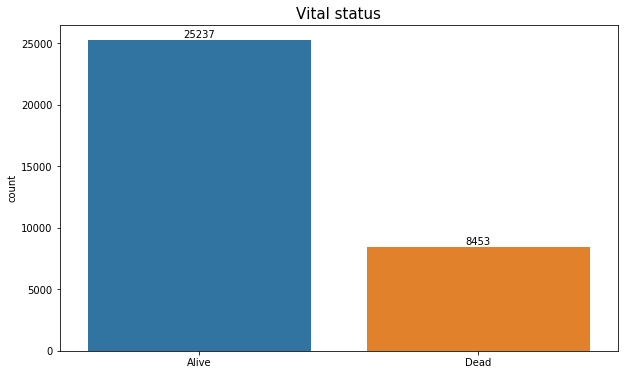

In [9]:
ax = sns.countplot(data = df, x = 'DEAD')
ax.set_xticklabels(['Alive', 'Dead'])
ax.set_title('Vital status', fontsize=15)
ax.set_xlabel('')
plt.gcf().set_size_inches(10,6)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha="center")

In [10]:
percentage_alive = np.mean(df['DEAD'] == 0) * 100
percentage_dead = np.mean(df['DEAD'] == 1) * 100
print("Percentage of patients classified as alive: %.2f" % percentage_alive)
print("Percentage of patients classified as dead: %.2f" % percentage_dead)

Percentage of patients classified as alive: 74.91
Percentage of patients classified as dead: 25.09


In [11]:
df.groupby('DEAD')['ETHNICITY'].value_counts()

DEAD  ETHNICITY                    
0     White British                    21596
      Other white background             714
      White Irish                        268
      Other ethnic group                 203
      Asian Indian                       197
      Black Caribbean                    185
      Asian Pakistani                    105
      Other Asian background             104
      Black African                      101
      Chinese                             77
      Other black background              56
      Asian Bangladeshi                   31
      Other mixed background              27
      White and black Caribbean           14
      Mixed white and Asian               13
      Mixed white and black African        5
      White                                5
      Other                                2
1     White British                     7331
      Other white background             247
      Other ethnic group                  86
      White Irish  

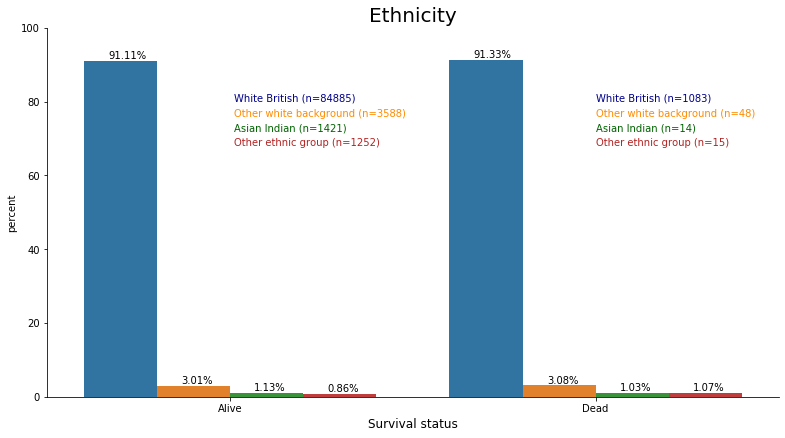

In [12]:
x, y = 'DEAD', 'ETHNICITY'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True).iloc[[0,1,2,3,18,19,20,21]]
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_title('Ethnicity', fontsize=20)
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(12,6)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 0.5
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.01, 80, "White British (n=84885)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.01, 76, "Other white background (n=3588)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.01, 72, "Asian Indian (n=1421)", horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(0.01, 68, "Other ethnic group (n=1252)", horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(1, 80, "White British (n=1083)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1, 76, "Other white background (n=48)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1, 72, "Asian Indian (n=14)", horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1, 68, "Other ethnic group (n=15)", horizontalalignment='left', size='medium', color='firebrick');

In [13]:
contingency = pd.crosstab(df['DEAD'], df['ETHNICITY'])
contingency

ETHNICITY,Asian Bangladeshi,Asian Indian,Asian Pakistani,Black African,Black Caribbean,Chinese,Mixed white and Asian,Mixed white and black African,Other,Other Asian background,Other black background,Other ethnic group,Other mixed background,Other white background,White,White British,White Irish,White and black Caribbean
DEAD,,,,,,,,,,,,,,,,,,
0,31,197,105,101,185,77,13,5,2,104,56,203,27,714,5,21596,268,14
1,12,51,27,31,59,15,5,9,0,34,24,86,4,247,2,7331,83,7


In [14]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.034836270053910254


In [15]:
# ax = df.groupby(['DEAD','SEX']).size().groupby(level=0).apply(
#     lambda x: 100 * x / x.sum()
# ).unstack().plot(kind='bar',stacked=True)

# ax.set(xticklabels=['Alive','Dead'])
# plt.xticks(rotation='horizontal')
# ax.set(xlabel='Survival status')
# ax.set(ylabel='Percentage')
# # plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.gcf().set_size_inches(10,5)

# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.2f} %'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


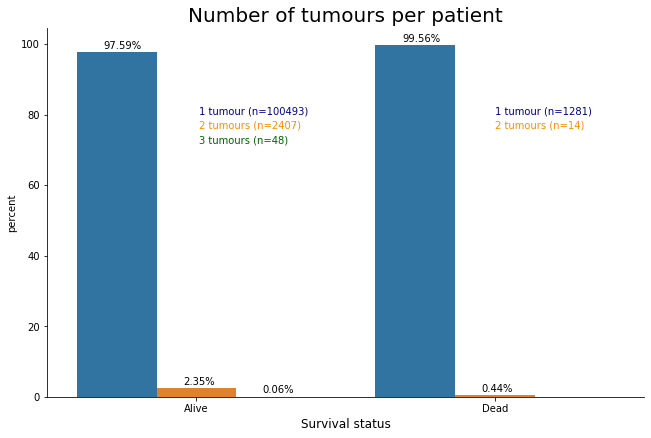

In [16]:
x, y = 'DEAD', 'NUMBER_TUMOURS'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_title('Number of tumours per patient', fontsize=20)
plt.gcf().set_size_inches(10,6)

                
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.01, 80, "1 tumour (n=100493)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.01, 76, "2 tumours (n=2407)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.01, 72, "3 tumours (n=48)", horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1, 80, "1 tumour (n=1281)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1, 76, "2 tumours (n=14)", horizontalalignment='left', size='medium', color='darkorange');

In [17]:
df.groupby('DEAD')['NUMBER_TUMOURS'].value_counts()

DEAD  NUMBER_TUMOURS
0     1                 24628
      2                   594
      3                    15
1     1                  8416
      2                    37
Name: NUMBER_TUMOURS, dtype: int64

In [18]:
contingency = pd.crosstab(df['DEAD'], df['NUMBER_TUMOURS'])
contingency

NUMBER_TUMOURS,1,2,3
DEAD,,,
0,24628,594,15
1,8416,37,0


In [19]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

2.5845147747532525e-29


In [20]:
df.groupby('DEAD')['C180'].value_counts()

DEAD  C180 
0     False    20084
      True      5153
1     False     6573
      True      1880
Name: C180, dtype: int64

In [21]:
df.groupby('DEAD')['C181'].value_counts()

DEAD  C181 
0     False    24370
      True       867
1     False     8245
      True       208
Name: C181, dtype: int64

In [22]:
df.groupby('DEAD')['C182'].value_counts()

DEAD  C182 
0     False    21735
      True      3502
1     False     7274
      True      1179
Name: C182, dtype: int64

In [23]:
df.groupby('DEAD')['C183'].value_counts()

DEAD  C183 
0     False    24070
      True      1167
1     False     8003
      True       450
Name: C183, dtype: int64

In [24]:
df.groupby('DEAD')['C184'].value_counts()

DEAD  C184 
0     False    23016
      True      2221
1     False     7730
      True       723
Name: C184, dtype: int64

In [25]:
df.groupby('DEAD')['C185'].value_counts()

DEAD  C185 
0     False    24328
      True       909
1     False     8164
      True       289
Name: C185, dtype: int64

In [26]:
df.groupby('DEAD')['C186'].value_counts()

DEAD  C186 
0     False    24109
      True      1128
1     False     8097
      True       356
Name: C186, dtype: int64

In [27]:
df.groupby('DEAD')['C187'].value_counts()

DEAD  C187 
0     False    17182
      True      8055
1     False     6047
      True      2406
Name: C187, dtype: int64

In [28]:
df.groupby('DEAD')['C188'].value_counts()

DEAD  C188 
0     False    25105
      True       132
1     False     8407
      True        46
Name: C188, dtype: int64

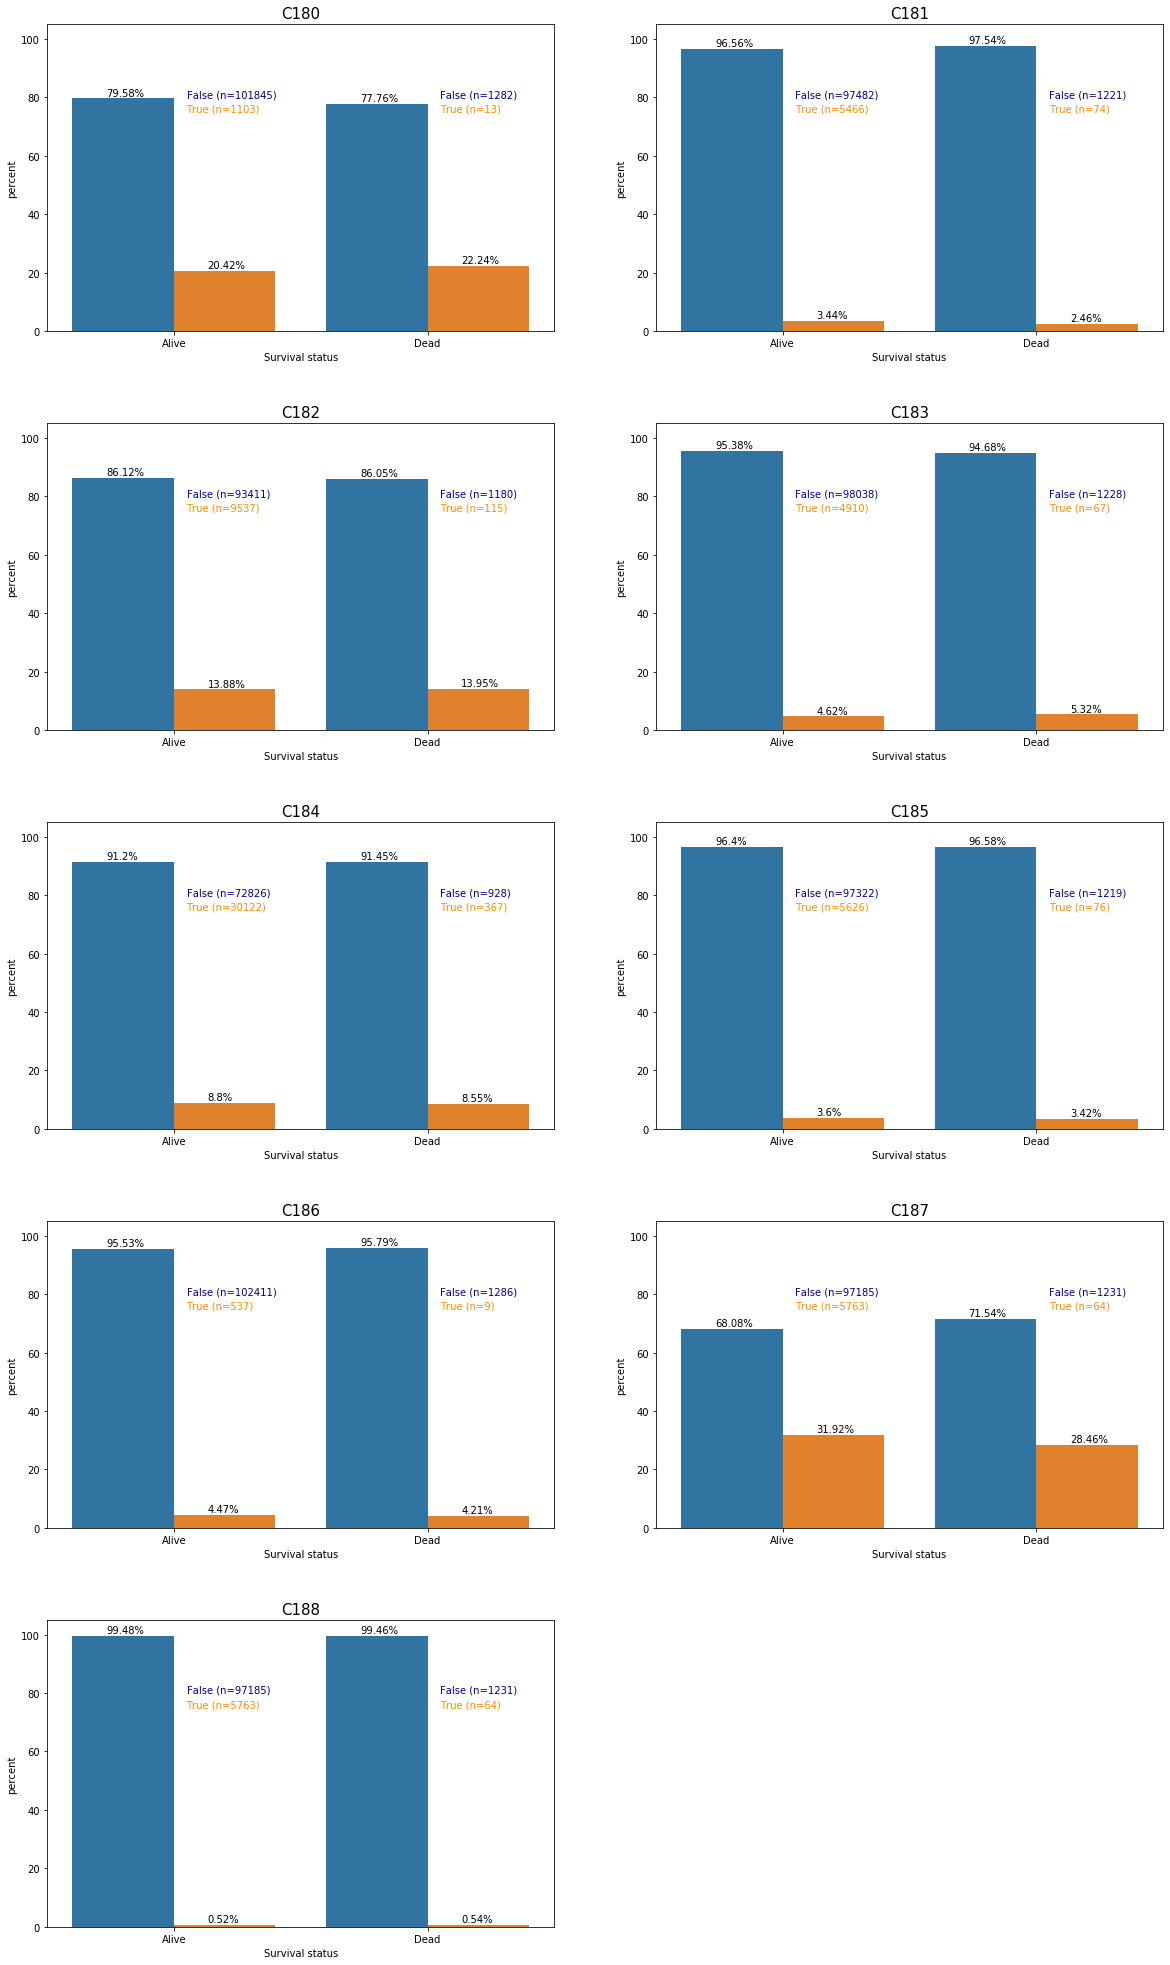

In [236]:
f, axes = plt.subplots(5, 2, figsize=(20, 35))
plt.subplots_adjust(hspace=0.3)

#Figure 1
x, y = 'DEAD', 'C180'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('C180', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=101845)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=1103)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1282)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=13)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'C181'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('C181', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=97482)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=5466)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1221)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=74)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'C182'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('C182', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=93411)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=9537)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1180)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=115)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'C183'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('C183', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=98038)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=4910)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1228)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=67)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 5
x, y = 'DEAD', 'C184'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('C184', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=72826)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=30122)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=928)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=367)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 6
x, y = 'DEAD', 'C185'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('C185', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 80, "False (n=97322)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=5626)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=1219)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 75, "True (n=76)", horizontalalignment='left', size='medium', color='darkorange')    
    
#Figure 7
x, y = 'DEAD', 'C186'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('C186', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=102411)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=537)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=1286)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 75, "True (n=9)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 8
x, y = 'DEAD', 'C187'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 1]))

axes[3,1].set_title('C187', fontsize=15)
axes[3,1].set(xticklabels=['Alive','Dead'])
axes[3,1].set(xlabel='Survival status')
axes[3,1].set_ylim(0,105)
axes[3,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
    
for p in axes[3,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,1].text(0.05, 80, "False (n=97185)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(0.05, 75, "True (n=5763)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,1].text(1.05, 80, "False (n=1231)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(1.05, 75, "True (n=64)", horizontalalignment='left', size='medium', color='darkorange')    

#Figure 9
x, y = 'DEAD', 'C188'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[4, 0]))

axes[4,0].set_title('C188', fontsize=15)
axes[4,0].set(xticklabels=['Alive','Dead'])
axes[4,0].set(xlabel='Survival status')
axes[4,0].set_ylim(0,105)
axes[4,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
    
for p in axes[4,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[4,0].text(txt_x,txt_y,txt)
    
axes[4,0].text(0.05, 80, "False (n=97185)", horizontalalignment='left', size='medium', color='darkblue')
axes[4,0].text(0.05, 75, "True (n=5763)", horizontalalignment='left', size='medium', color='darkorange')
axes[4,0].text(1.05, 80, "False (n=1231)", horizontalalignment='left', size='medium', color='darkblue')
axes[4,0].text(1.05, 75, "True (n=64)", horizontalalignment='left', size='medium', color='darkorange')

 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.close(10)
f.delaxes(ax = axes[4,1])
plt.show()

In [30]:
df.groupby('DEAD')['BEH_BENIGN'].value_counts()

DEAD  BEH_BENIGN
0     False         25233
      True              4
1     False          8453
Name: BEH_BENIGN, dtype: int64

In [31]:
df.groupby('DEAD')['BEH_MALIG'].value_counts()

DEAD  BEH_MALIG
0     True         25171
      False           66
1     True          8447
      False            6
Name: BEH_MALIG, dtype: int64

In [32]:
df.groupby('DEAD')['BEH_MICINV'].value_counts()

DEAD  BEH_MICINV
0     False         25233
      True              4
1     False          8453
Name: BEH_MICINV, dtype: int64

In [33]:
df.groupby('DEAD')['BEH_INSITU'].value_counts()

DEAD  BEH_INSITU
0     False         25195
      True             42
1     False          8452
      True              1
Name: BEH_INSITU, dtype: int64

In [34]:
df.groupby('DEAD')['BEH_UNCERT'].value_counts()

DEAD  BEH_UNCERT
0     False         25227
      True             10
1     False          8450
      True              3
Name: BEH_UNCERT, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


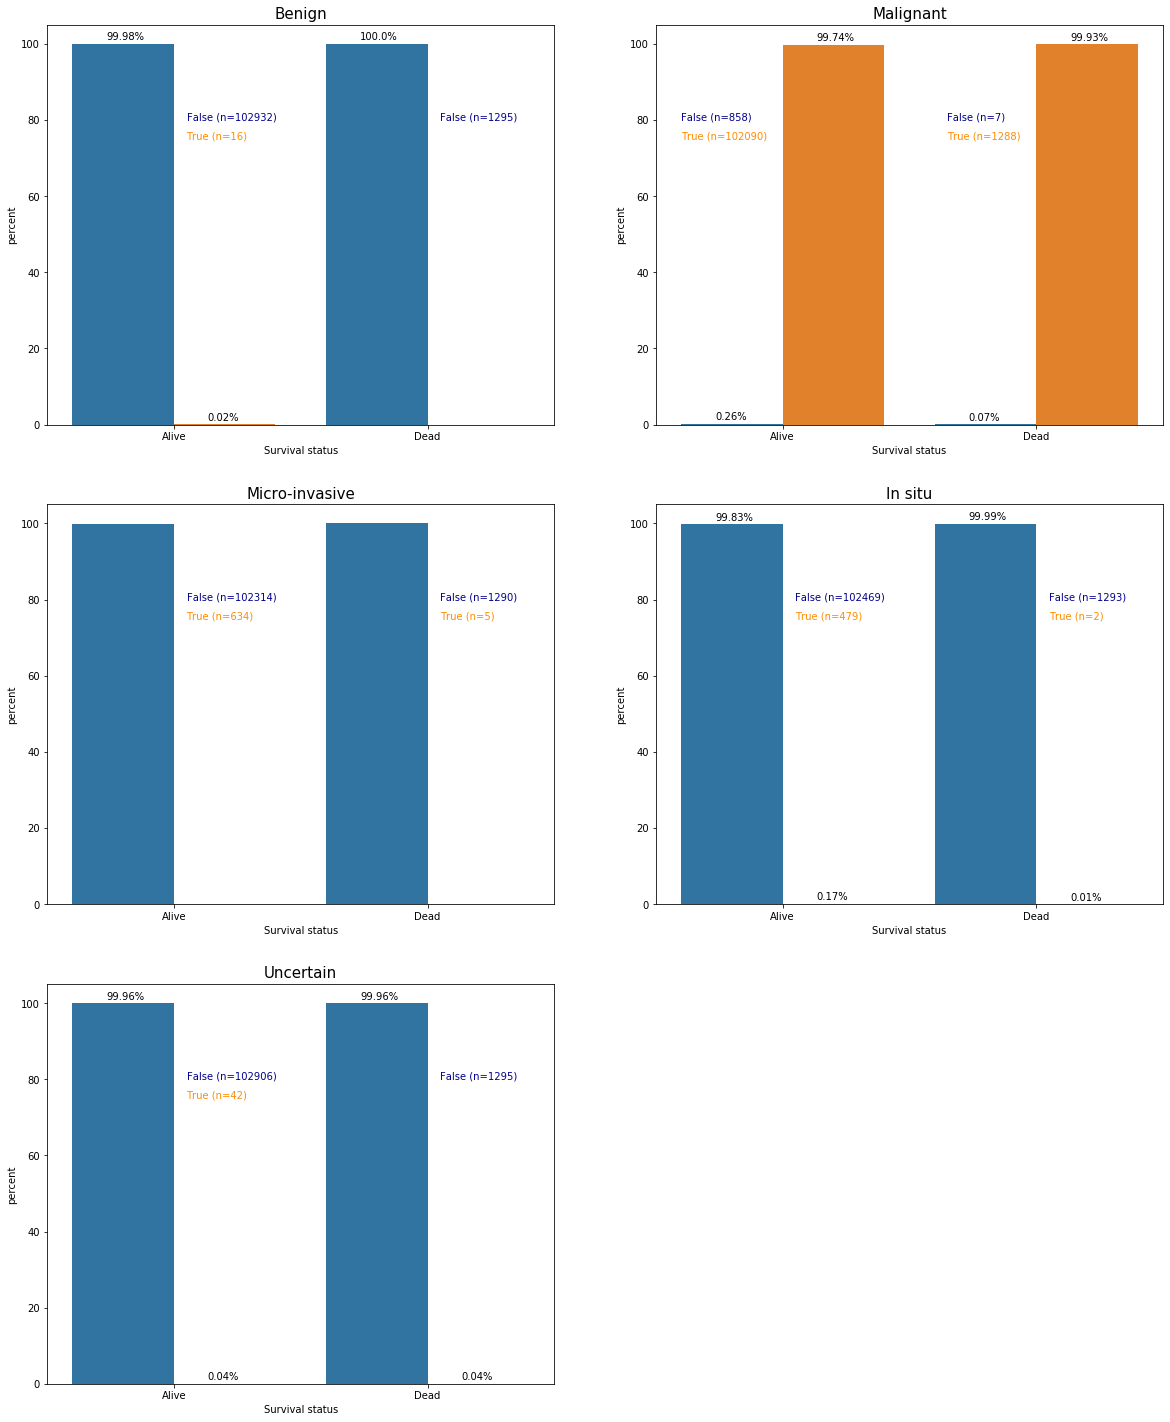

In [35]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'BEH_BENIGN'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Benign', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)

axes[0,0].text(0.05, 80, "False (n=102932)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=16)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')


#Figure 2
x, y = 'DEAD', 'BEH_MALIG'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Malignant', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)
    
axes[0,1].text(-0.4, 80, "False (n=858)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(-0.4, 75, "True (n=102090)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(0.65, 80, "False (n=7)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.65, 75, "True (n=1288)", horizontalalignment='left', size='medium', color='darkorange')    

#Figure 3
x, y = 'DEAD', 'BEH_MICINV'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Micro-invasive', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
axes[1,0].text(0.05, 80, "False (n=102314)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=634)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1290)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=5)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'BEH_INSITU'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('In situ', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=102469)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=479)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1293)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=2)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'BEH_UNCERT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Uncertain', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=102906)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=42)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')   
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [36]:
contingency = pd.crosstab(df['DEAD'], df['BEH_BENIGN'])
contingency

BEH_BENIGN,False,True
DEAD,,
0,25233,4
1,8453,0


In [37]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5613302345904574


In [38]:
contingency = pd.crosstab(df['DEAD'], df['BEH_MALIG'])
contingency

BEH_MALIG,False,True
DEAD,,
0,66,25171
1,6,8447


In [39]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0016482916174079933


In [40]:
contingency = pd.crosstab(df['DEAD'], df['BEH_MICINV'])
contingency

BEH_MICINV,False,True
DEAD,,
0,25233,4
1,8453,0


In [41]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5613302345904574


In [42]:
contingency = pd.crosstab(df['DEAD'], df['BEH_INSITU'])
contingency

BEH_INSITU,False,True
DEAD,,
0,25195,42
1,8452,1


In [43]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0010772600382926252


In [44]:
contingency = pd.crosstab(df['DEAD'], df['BEH_UNCERT'])
contingency

BEH_UNCERT,False,True
DEAD,,
0,25227,10
1,8450,3


In [45]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8788432189173621


In [46]:
df.groupby('DEAD')['T0'].value_counts()

DEAD  T0   
0     False    25230
      True         7
1     False     8451
      True         2
Name: T0, dtype: int64

In [47]:
df.groupby('DEAD')['T1'].value_counts()

DEAD  T1   
0     False    22373
      True      2864
1     False     8173
      True       280
Name: T1, dtype: int64

In [48]:
df.groupby('DEAD')['T2'].value_counts()

DEAD  T2   
0     False    22065
      True      3172
1     False     8038
      True       415
Name: T2, dtype: int64

In [49]:
df.groupby('DEAD')['T3'].value_counts()

DEAD  T3   
0     False    14580
      True     10657
1     False     5843
      True      2610
Name: T3, dtype: int64

In [50]:
df.groupby('DEAD')['T4'].value_counts()

DEAD  T4   
0     False    19509
      True      5728
1     False     6187
      True      2266
Name: T4, dtype: int64

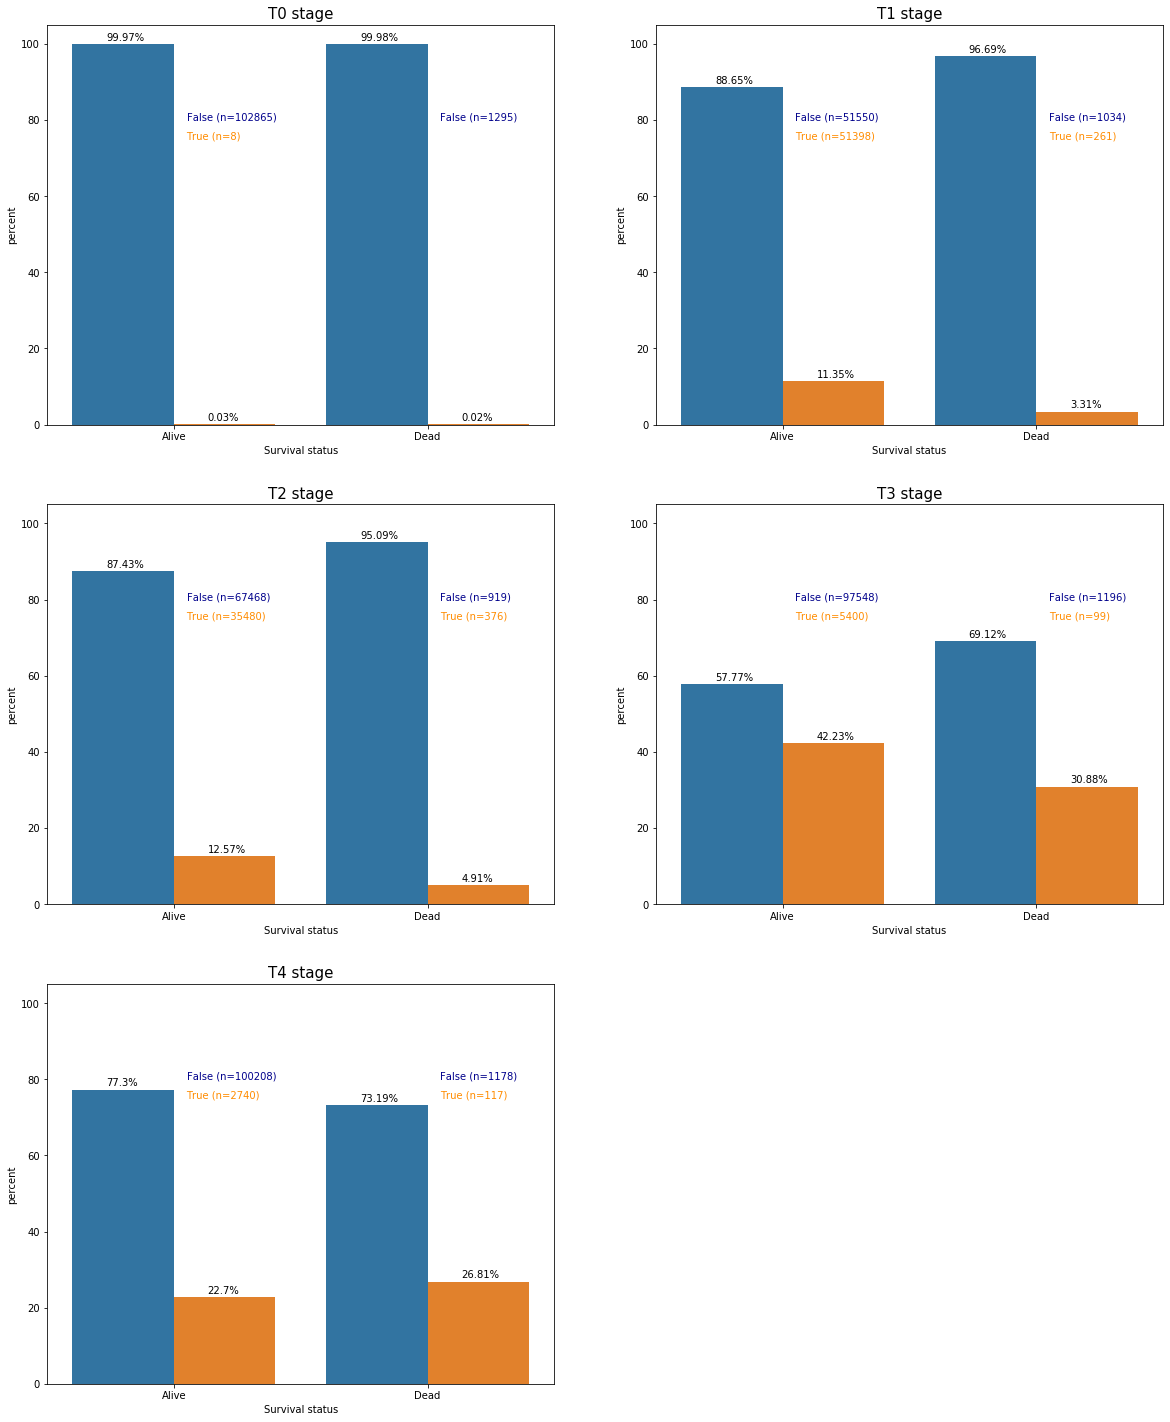

In [51]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'T0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('T0 stage', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=102865)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=8)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')

#Figure 2
x, y = 'DEAD', 'T1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('T1 stage', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=51550)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=51398)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1034)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=261)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'T2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('T2 stage', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=67468)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=35480)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=919)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=376)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 4
x, y = 'DEAD', 'T3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('T3 stage', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=97548)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=5400)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1196)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=99)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'T4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('T4 stage', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=100208)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=2740)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1178)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=117)", horizontalalignment='left', size='medium', color='darkorange')
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [52]:
contingency = pd.crosstab(df['DEAD'], df['T0'])
contingency

T0,False,True
DEAD,,
0,25230,7
1,8451,2


In [53]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8524613720234681


In [54]:
contingency = pd.crosstab(df['DEAD'], df['T1'])
contingency

T1,False,True
DEAD,,
0,22373,2864
1,8173,280


In [55]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

6.676169536760667e-107


In [56]:
contingency = pd.crosstab(df['DEAD'], df['T2'])
contingency

T2,False,True
DEAD,,
0,22065,3172
1,8038,415


In [57]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

9.76984013740833e-87


In [58]:
contingency = pd.crosstab(df['DEAD'], df['T3'])
contingency

T3,False,True
DEAD,,
0,14580,10657
1,5843,2610


In [59]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

3.337588189437832e-76


In [60]:
contingency = pd.crosstab(df['DEAD'], df['T4'])
contingency

T4,False,True
DEAD,,
0,19509,5728
1,6187,2266


In [61]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.6745653346419808e-14


In [62]:
df.groupby('DEAD')['N0'].value_counts()

DEAD  N0   
0     True     14026
      False    11211
1     False     6464
      True      1989
Name: N0, dtype: int64

In [63]:
df.groupby('DEAD')['N1'].value_counts()

DEAD  N1   
0     False    20182
      True      5055
1     False     6400
      True      2053
Name: N1, dtype: int64

In [64]:
df.groupby('DEAD')['N2'].value_counts()

DEAD  N2   
0     False    22254
      True      2983
1     False     6905
      True      1548
Name: N2, dtype: int64

In [65]:
df.groupby('DEAD')['N3'].value_counts()

DEAD  N3   
0     False    25206
      True        31
1     False     8438
      True        15
Name: N3, dtype: int64

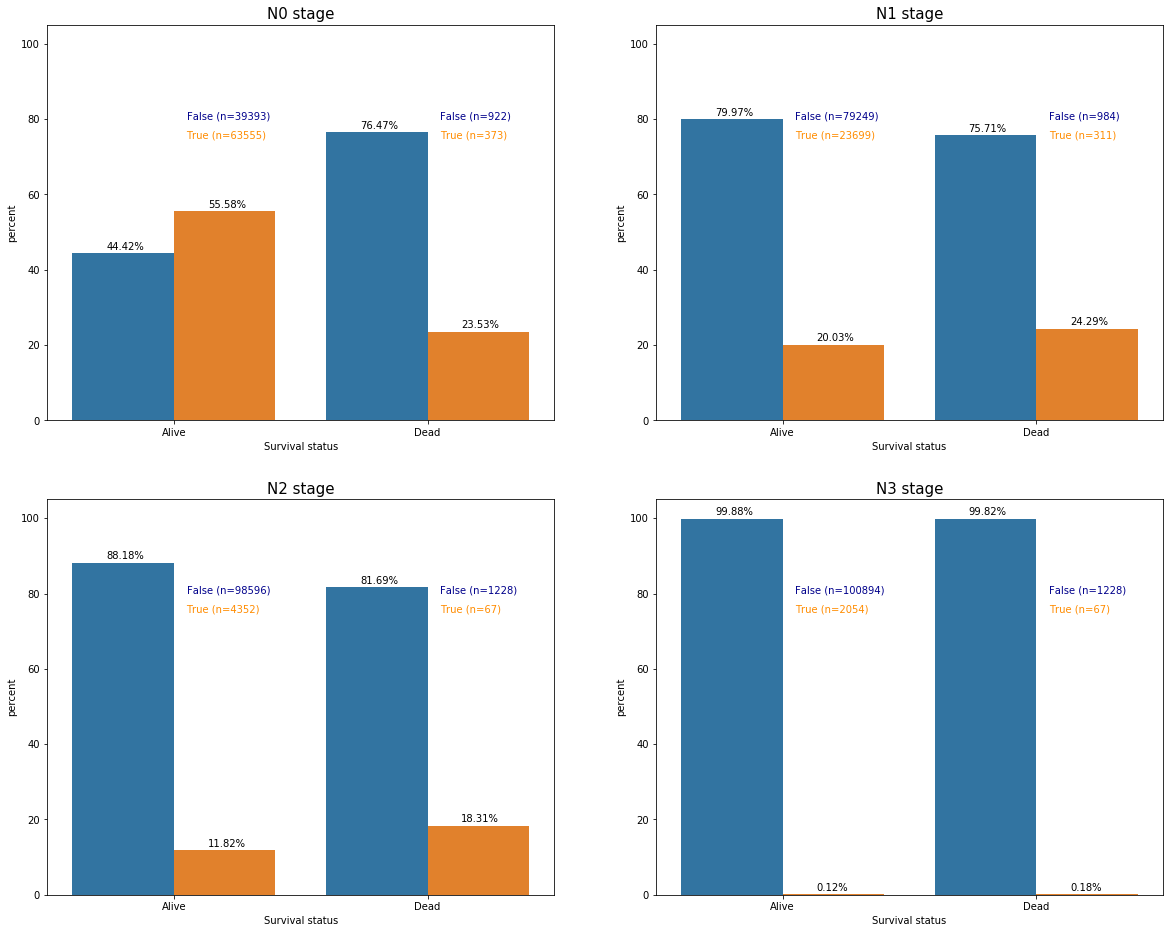

In [66]:
f, axes = plt.subplots(2, 2, figsize=(20, 16))

#Figure 1
x, y = 'DEAD', 'N0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('N0 stage', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=39393)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=63555)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=922)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=373)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'N1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('N1 stage', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=79249)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=23699)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=984)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=311)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'N2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('N2 stage', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=98596)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=4352)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1228)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=67)", horizontalalignment='left', size='medium', color='darkorange')
    
#Figure 4
x, y = 'DEAD', 'N3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('N3 stage', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=100894)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=2054)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1228)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=67)", horizontalalignment='left', size='medium', color='darkorange')

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [67]:
contingency = pd.crosstab(df['DEAD'], df['N0'])
contingency

N0,False,True
DEAD,,
0,11211,14026
1,6464,1989


In [68]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [69]:
contingency = pd.crosstab(df['DEAD'], df['N1'])
contingency

N1,False,True
DEAD,,
0,20182,5055
1,6400,2053


In [70]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.1577602005921454e-16


In [71]:
contingency = pd.crosstab(df['DEAD'], df['N2'])
contingency

N2,False,True
DEAD,,
0,22254,2983
1,6905,1548


In [72]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.0973711417784745e-51


In [73]:
contingency = pd.crosstab(df['DEAD'], df['N3'])
contingency

N3,False,True
DEAD,,
0,25206,31
1,8438,15


In [74]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.314029046788351


In [75]:
df.groupby('DEAD')['M1'].value_counts()

DEAD  M1   
0     False    22669
      True      2568
1     False     4617
      True      3836
Name: M1, dtype: int64

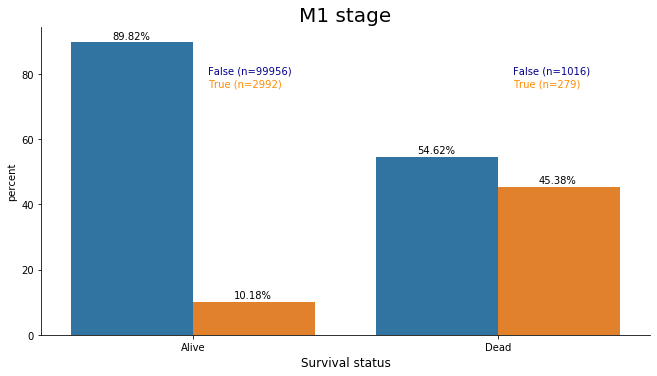

In [76]:
x, y = 'DEAD', 'M1'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('M1 stage', fontsize=20)
ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 80, "False (n=99956)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 76, "True (n=2992)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, "False (n=1016)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 76, "True (n=279)", horizontalalignment='left', size='medium', color='darkorange');

In [77]:
contingency = pd.crosstab(df['DEAD'], df['M1'])
contingency

M1,False,True
DEAD,,
0,22669,2568
1,4617,3836


In [78]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [79]:
df.groupby('DEAD')['STAGE0'].value_counts()

DEAD  STAGE0
0     False     25172
      True         65
1     False      8444
      True          9
Name: STAGE0, dtype: int64

In [80]:
df.groupby('DEAD')['STAGE1'].value_counts()

DEAD  STAGE1
0     False     20384
      True       4853
1     False      8143
      True        310
Name: STAGE1, dtype: int64

In [81]:
df.groupby('DEAD')['STAGE2'].value_counts()

DEAD  STAGE2
0     False     16423
      True       8814
1     False      7522
      True        931
Name: STAGE2, dtype: int64

In [82]:
df.groupby('DEAD')['STAGE3'].value_counts()

DEAD  STAGE3
0     False     18588
      True       6649
1     False      6941
      True       1512
Name: STAGE3, dtype: int64

In [83]:
df.groupby('DEAD')['STAGE4'].value_counts()

DEAD  STAGE4
0     False     22580
      True       2657
1     False      4524
      True       3929
Name: STAGE4, dtype: int64

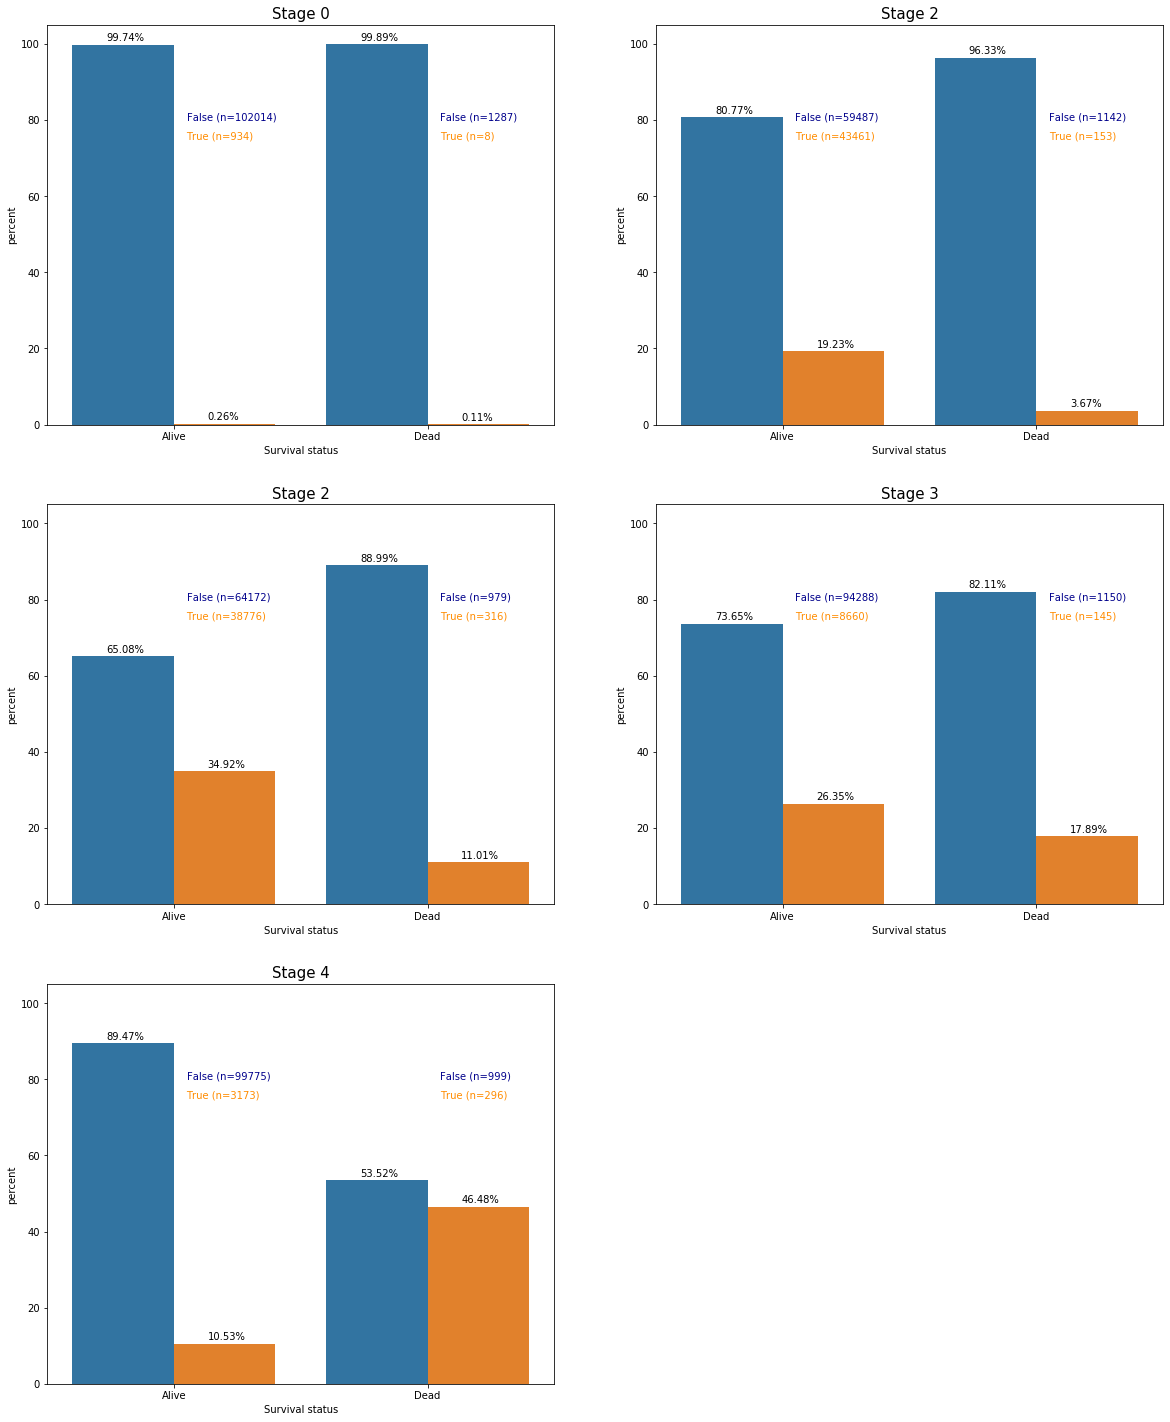

In [84]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'STAGE0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Stage 0', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=102014)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=934)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1287)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=8)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'STAGE1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Stage 2', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=59487)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=43461)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1142)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=153)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'STAGE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Stage 2', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=64172)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=38776)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=979)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=316)", horizontalalignment='left', size='medium', color='darkorange')
    
#Figure 4
x, y = 'DEAD', 'STAGE3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Stage 3', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=94288)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=8660)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1150)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=145)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 5
x, y = 'DEAD', 'STAGE4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Stage 4', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=99775)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=3173)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=999)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=296)", horizontalalignment='left', size='medium', color='darkorange')
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [85]:
contingency = pd.crosstab(df['DEAD'], df['STAGE0'])
contingency

STAGE0,False,True
DEAD,,
0,25172,65
1,8444,9


In [86]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.014937375824228282


In [87]:
contingency = pd.crosstab(df['DEAD'], df['STAGE1'])
contingency

STAGE1,False,True
DEAD,,
0,20384,4853
1,8143,310


In [88]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.0048182556045937e-258


In [89]:
contingency = pd.crosstab(df['DEAD'], df['STAGE2'])
contingency

STAGE2,False,True
DEAD,,
0,16423,8814
1,7522,931


In [90]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [91]:
contingency = pd.crosstab(df['DEAD'], df['STAGE3'])
contingency

STAGE3,False,True
DEAD,,
0,18588,6649
1,6941,1512


In [92]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.5965545155311883e-55


In [93]:
contingency = pd.crosstab(df['DEAD'], df['STAGE4'])
contingency

STAGE4,False,True
DEAD,,
0,22580,2657
1,4524,3929


In [94]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [95]:
df.groupby('DEAD')['GRADE1'].value_counts()

DEAD  GRADE1
0     False     23325
      True       1912
1     False      8281
      True        172
Name: GRADE1, dtype: int64

In [96]:
df.groupby('DEAD')['GRADE2'].value_counts()

DEAD  GRADE2
0     True      17525
      False      7712
1     False      5489
      True       2964
Name: GRADE2, dtype: int64

In [97]:
df.groupby('DEAD')['GRADE3'].value_counts()

DEAD  GRADE3
0     False     21945
      True       3292
1     False      7032
      True       1421
Name: GRADE3, dtype: int64

In [98]:
df.groupby('DEAD')['GRADE4'].value_counts()

DEAD  GRADE4
0     False     25201
      True         36
1     False      8421
      True         32
Name: GRADE4, dtype: int64

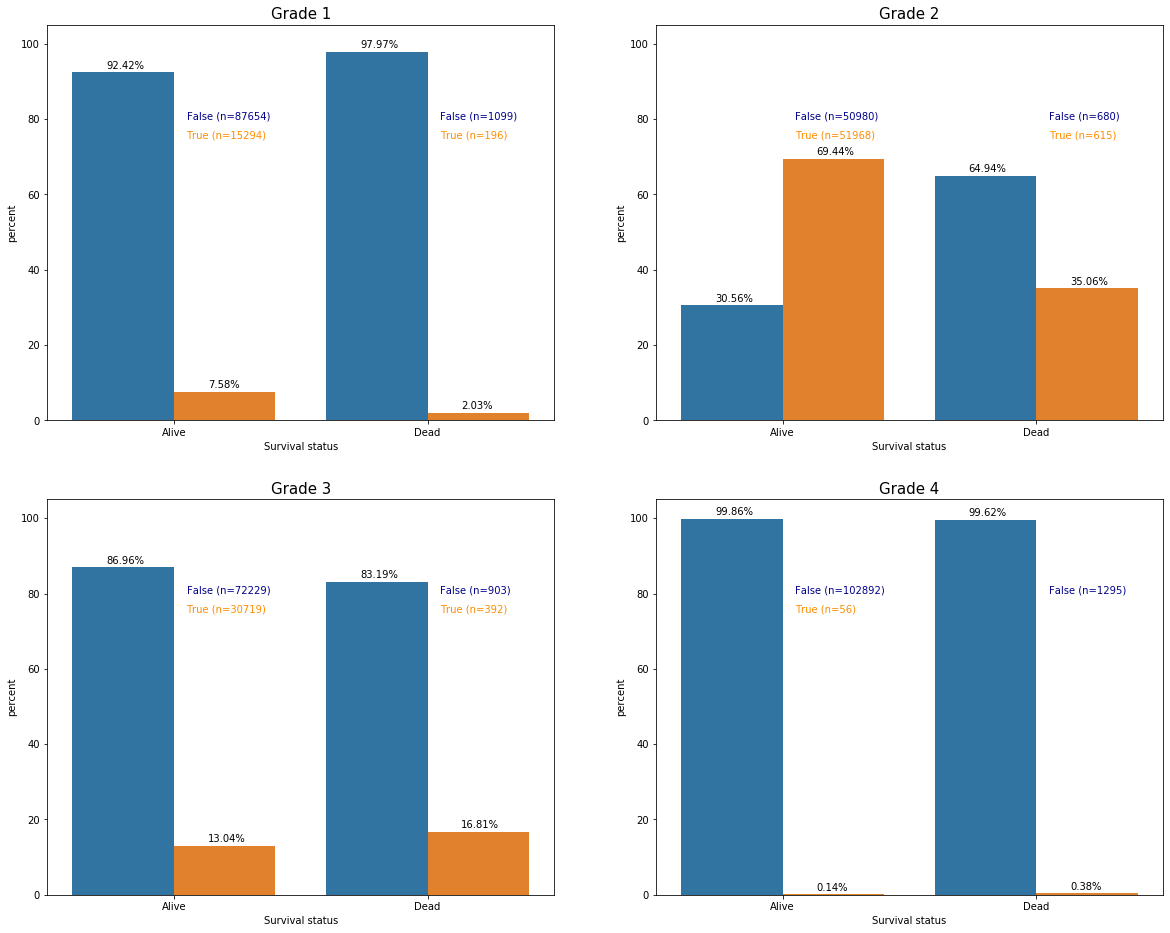

In [99]:
f, axes = plt.subplots(2, 2, figsize=(20, 16))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'GRADE1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Grade 1', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=87654)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=15294)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1099)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=196)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'GRADE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Grade 2', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, 'False (n=50980)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, 'True (n=51968)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, 'False (n=680)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, 'True (n=615)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'GRADE3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Grade 3', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=72229)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=30719)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=903)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=392)", horizontalalignment='left', size='medium', color='darkorange')               

#Figure 4
x, y = 'DEAD', 'GRADE4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Grade 4', fontsize=15)               
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()               
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=102892)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=56)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [100]:
contingency = pd.crosstab(df['DEAD'], df['GRADE1'])
contingency

GRADE1,False,True
DEAD,,
0,23325,1912
1,8281,172


In [101]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.2269733986966369e-74


In [102]:
contingency = pd.crosstab(df['DEAD'], df['GRADE2'])
contingency

GRADE2,False,True
DEAD,,
0,7712,17525
1,5489,2964


In [103]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [104]:
contingency = pd.crosstab(df['DEAD'], df['GRADE3'])
contingency

GRADE3,False,True
DEAD,,
0,21945,3292
1,7032,1421


In [105]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

6.590687578838675e-18


In [106]:
contingency = pd.crosstab(df['DEAD'], df['GRADE4'])
contingency

GRADE4,False,True
DEAD,,
0,25201,36
1,8421,32


In [107]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

5.2818838358785315e-05


In [108]:
df.groupby('DEAD')['AGE_MEDIAN'].describe()

,count,mean,std,min,25%,50%,75%,max
DEAD,,,,,,,,
0,25237.0,70.113365,13.444866,3.0,63.0,72.0,80.0,104.0
1,8453.0,73.413167,13.020999,0.0,66.0,76.0,83.0,105.0


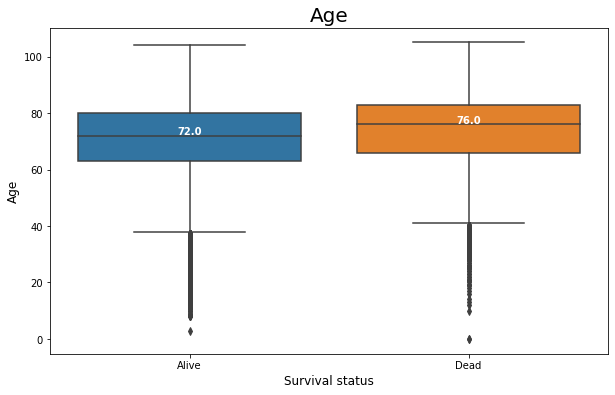

In [109]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'AGE_MEDIAN')

medians = df.groupby(['DEAD'])['AGE_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='white', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_title('Age', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [110]:
df.groupby('DEAD')['L0801'].value_counts()

DEAD  L0801
0     False    20185
      True      5052
1     False     6813
      True      1640
Name: L0801, dtype: int64

In [111]:
df.groupby('DEAD')['L0201'].value_counts()

DEAD  L0201
0     False    21926
      True      3311
1     False     7300
      True      1153
Name: L0201, dtype: int64

In [112]:
df.groupby('DEAD')['L0301'].value_counts()

DEAD  L0301
0     False    22873
      True      2364
1     False     7618
      True       835
Name: L0301, dtype: int64

In [113]:
df.groupby('DEAD')['L1201'].value_counts()

DEAD  L1201
0     False    22498
      True      2739
1     False     7522
      True       931
Name: L1201, dtype: int64

In [114]:
df.groupby('DEAD')['L0401'].value_counts()

DEAD  L0401
0     False    22120
      True      3117
1     False     7502
      True       951
Name: L0401, dtype: int64

In [115]:
df.groupby('DEAD')['L1701'].value_counts()

DEAD  L1701
0     False    21957
      True      3280
1     False     7313
      True      1140
Name: L1701, dtype: int64

In [116]:
df.groupby('DEAD')['L1001'].value_counts()

DEAD  L1001
0     False    21323
      True      3914
1     False     7109
      True      1344
Name: L1001, dtype: int64

In [117]:
df.groupby('DEAD')['L0901'].value_counts()

DEAD  L0901
0     False    23771
      True      1466
1     False     7994
      True       459
Name: L0901, dtype: int64

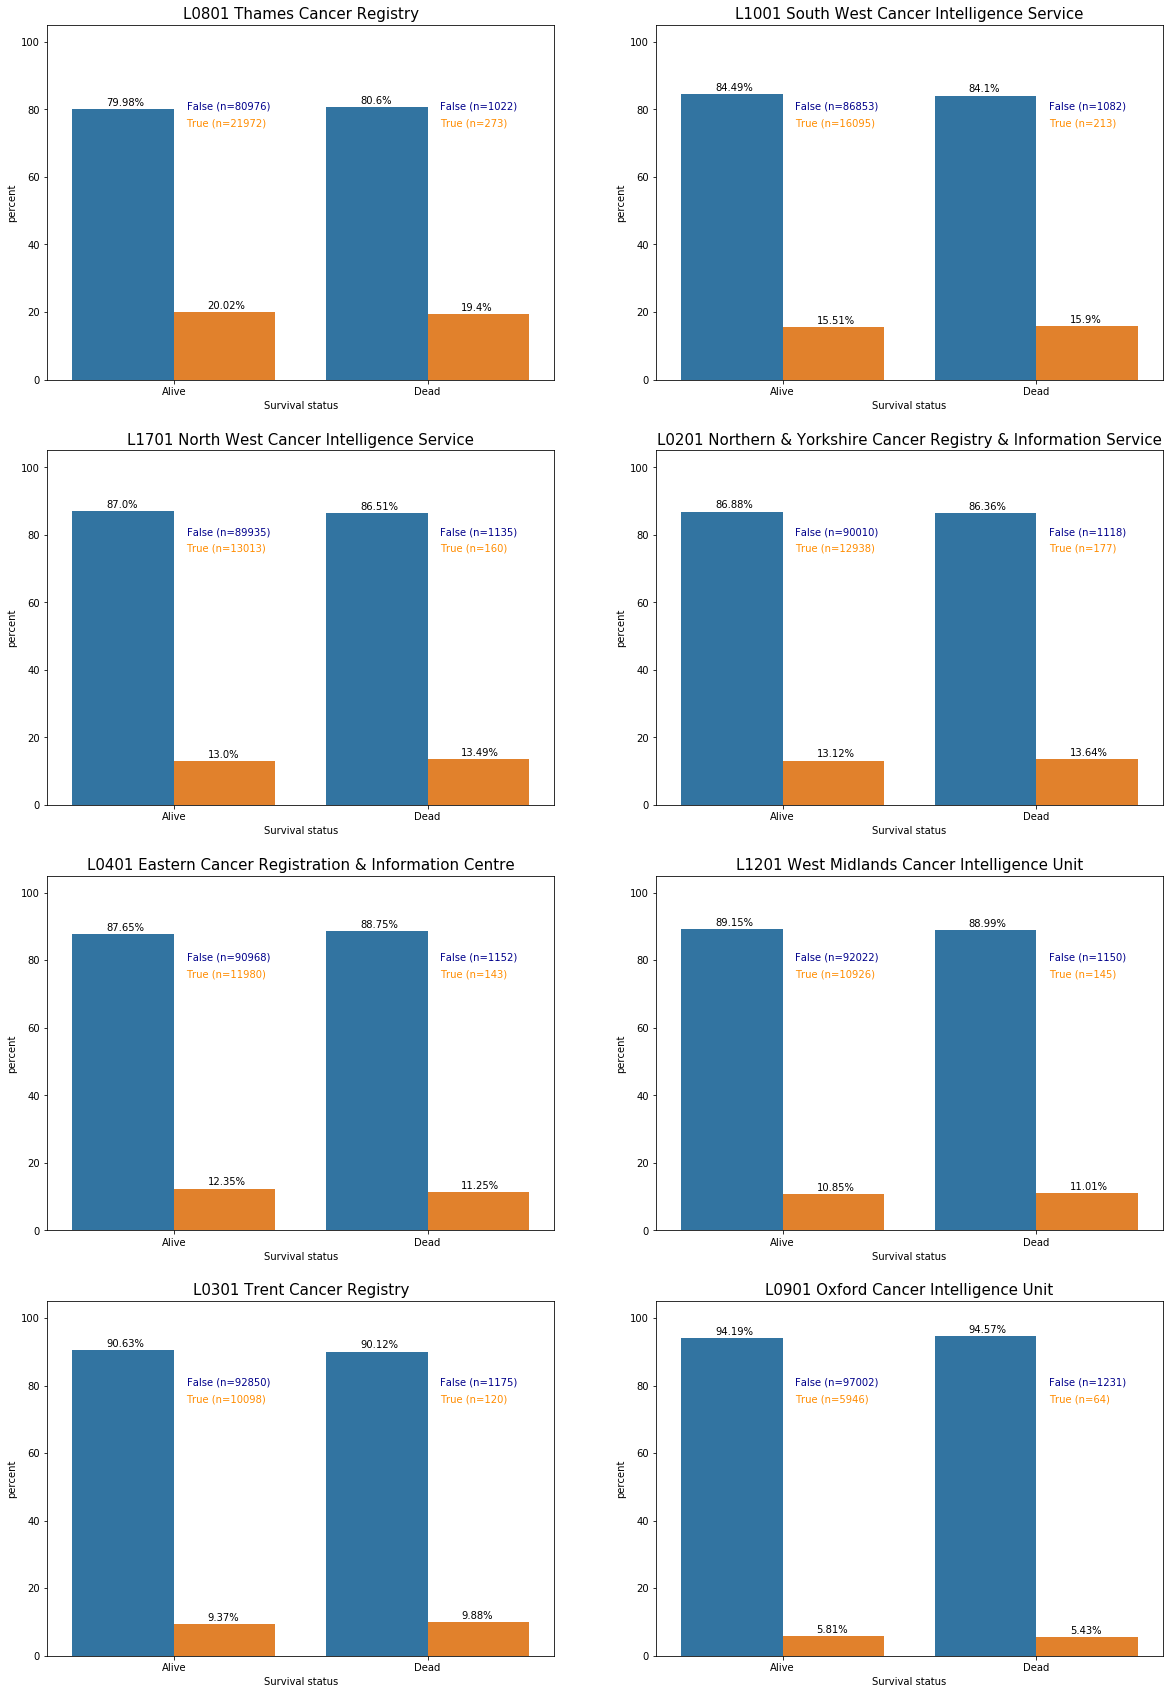

In [118]:
f, axes = plt.subplots(4, 2, figsize=(20, 30))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'L0801'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('L0801 Thames Cancer Registry', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=80976)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=21972)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1022)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=273)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'L1001'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('L1001 South West Cancer Intelligence Service', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=86853)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=16095)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1082)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=213)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'L1701'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('L1701 North West Cancer Intelligence Service', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=89935)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=13013)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1135)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=160)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'L0201'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('L0201 Northern & Yorkshire Cancer Registry & Information Service', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=90010)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=12938)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1118)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=177)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 5
x, y = 'DEAD', 'L0401'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('L0401 Eastern Cancer Registration & Information Centre', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=90968)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=11980)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1152)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=143)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 6
x, y = 'DEAD', 'L1201'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('L1201 West Midlands Cancer Intelligence Unit', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 80, "False (n=92022)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=10926)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=1150)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 75, "True (n=145)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 7
x, y = 'DEAD', 'L0301'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('L0301 Trent Cancer Registry', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=92850)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=10098)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=1175)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 75, "True (n=120)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 8
x, y = 'DEAD', 'L0901'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 1]))

axes[3,1].set_title('L0901 Oxford Cancer Intelligence Unit', fontsize=15)
axes[3,1].set(xticklabels=['Alive','Dead'])
axes[3,1].set(xlabel='Survival status')
axes[3,1].set_ylim(0,105)
axes[3,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[3,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,1].text(0.05, 80, "False (n=97002)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(0.05, 75, "True (n=5946)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,1].text(1.05, 80, "False (n=1231)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(1.05, 75, "True (n=64)", horizontalalignment='left', size='medium', color='darkorange')  
    
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.show()

In [119]:
contingency = pd.crosstab(df['DEAD'], df['L0801'])
contingency

L0801,False,True
DEAD,,
0,20185,5052
1,6813,1640


In [120]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.22455211076741832


In [121]:
contingency = pd.crosstab(df['DEAD'], df['L1001'])
contingency

L1001,False,True
DEAD,,
0,21323,3914
1,7109,1344


In [122]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.40127261155656535


In [123]:
contingency = pd.crosstab(df['DEAD'], df['L1701'])
contingency

L1701,False,True
DEAD,,
0,21957,3280
1,7313,1140


In [124]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.25627943473703174


In [125]:
contingency = pd.crosstab(df['DEAD'], df['L0201'])
contingency

L0201,False,True
DEAD,,
0,21926,3311
1,7300,1153


In [126]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.22892734516113694


In [127]:
contingency = pd.crosstab(df['DEAD'], df['L0401'])
contingency

L0401,False,True
DEAD,,
0,22120,3117
1,7502,951


In [128]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.007624574061036572


In [129]:
contingency = pd.crosstab(df['DEAD'], df['L1201'])
contingency

L1201,False,True
DEAD,,
0,22498,2739
1,7522,931


In [130]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6962791696009853


In [131]:
contingency = pd.crosstab(df['DEAD'], df['L0301'])
contingency

L0301,False,True
DEAD,,
0,22873,2364
1,7618,835


In [132]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.1720908020194393


In [133]:
contingency = pd.crosstab(df['DEAD'], df['L0901'])
contingency

L0901,False,True
DEAD,,
0,23771,1466
1,7994,459


In [134]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.2033900226208886


In [135]:
df.groupby('DEAD')['CURATIVE_TREAT'].value_counts()

DEAD  CURATIVE_TREAT
0     False             18047
      True               7190
1     False              6037
      True               2416
Name: CURATIVE_TREAT, dtype: int64

In [136]:
df.groupby('DEAD')['NONCURATIVE_TREAT'].value_counts()

DEAD  NONCURATIVE_TREAT
0     False                23416
      True                  1821
1     False                 7867
      True                   586
Name: NONCURATIVE_TREAT, dtype: int64

In [137]:
df.groupby('DEAD')['NO_ACTIVE_TREAT'].value_counts()

DEAD  NO_ACTIVE_TREAT
0     False              24743
      True                 494
1     False               8292
      True                 161
Name: NO_ACTIVE_TREAT, dtype: int64

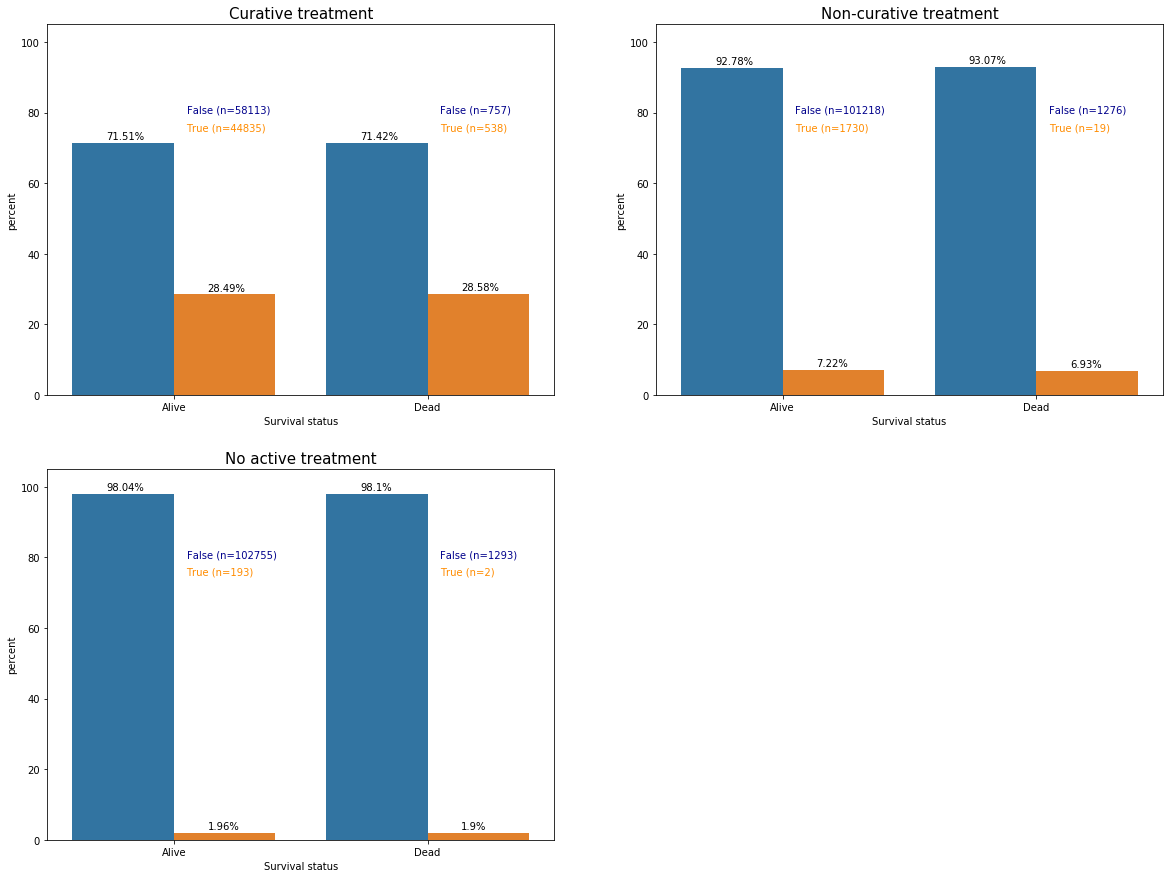

In [138]:
f, axes = plt.subplots(2, 2, figsize=(20, 15))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'CURATIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Curative treatment', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=58113)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=44835)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=757)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=538)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'NONCURATIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Non-curative treatment', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, 'False (n=101218)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, 'True (n=1730)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, 'False (n=1276)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, 'True (n=19)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'NO_ACTIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('No active treatment', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=102755)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=193)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1293)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=2)", horizontalalignment='left', size='medium', color='darkorange')
    
plt.close(2)
plt.close(3)
plt.close(4)
f.delaxes(ax = axes[1,1]) 
plt.show()

In [139]:
contingency = pd.crosstab(df['DEAD'], df['CURATIVE_TREAT'])
contingency

CURATIVE_TREAT,False,True
DEAD,,
0,18047,7190
1,6037,2416


In [140]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8826388990073631


In [141]:
contingency = pd.crosstab(df['DEAD'], df['NONCURATIVE_TREAT'])
contingency

NONCURATIVE_TREAT,False,True
DEAD,,
0,23416,1821
1,7867,586


In [142]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3951175307557322


In [143]:
contingency = pd.crosstab(df['DEAD'], df['NO_ACTIVE_TREAT'])
contingency

NO_ACTIVE_TREAT,False,True
DEAD,,
0,24743,494
1,8292,161


In [144]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7958222190566735


In [145]:
df.groupby('DEAD')['ECOG0'].value_counts()

DEAD  ECOG0
0     False    21750
      True      3487
1     False     7276
      True      1177
Name: ECOG0, dtype: int64

In [146]:
df.groupby('DEAD')['ECOG1'].value_counts()

DEAD  ECOG1
0     False    23116
      True      2121
1     False     7749
      True       704
Name: ECOG1, dtype: int64

In [147]:
df.groupby('DEAD')['ECOG2'].value_counts()

DEAD  ECOG2
0     False    24229
      True      1008
1     False     8145
      True       308
Name: ECOG2, dtype: int64

In [148]:
df.groupby('DEAD')['ECOG3'].value_counts()

DEAD  ECOG3
0     False    24615
      True       622
1     False     8271
      True       182
Name: ECOG3, dtype: int64

In [149]:
df.groupby('DEAD')['ECOG4'].value_counts()

DEAD  ECOG4
0     False    25081
      True       156
1     False     8414
      True        39
Name: ECOG4, dtype: int64

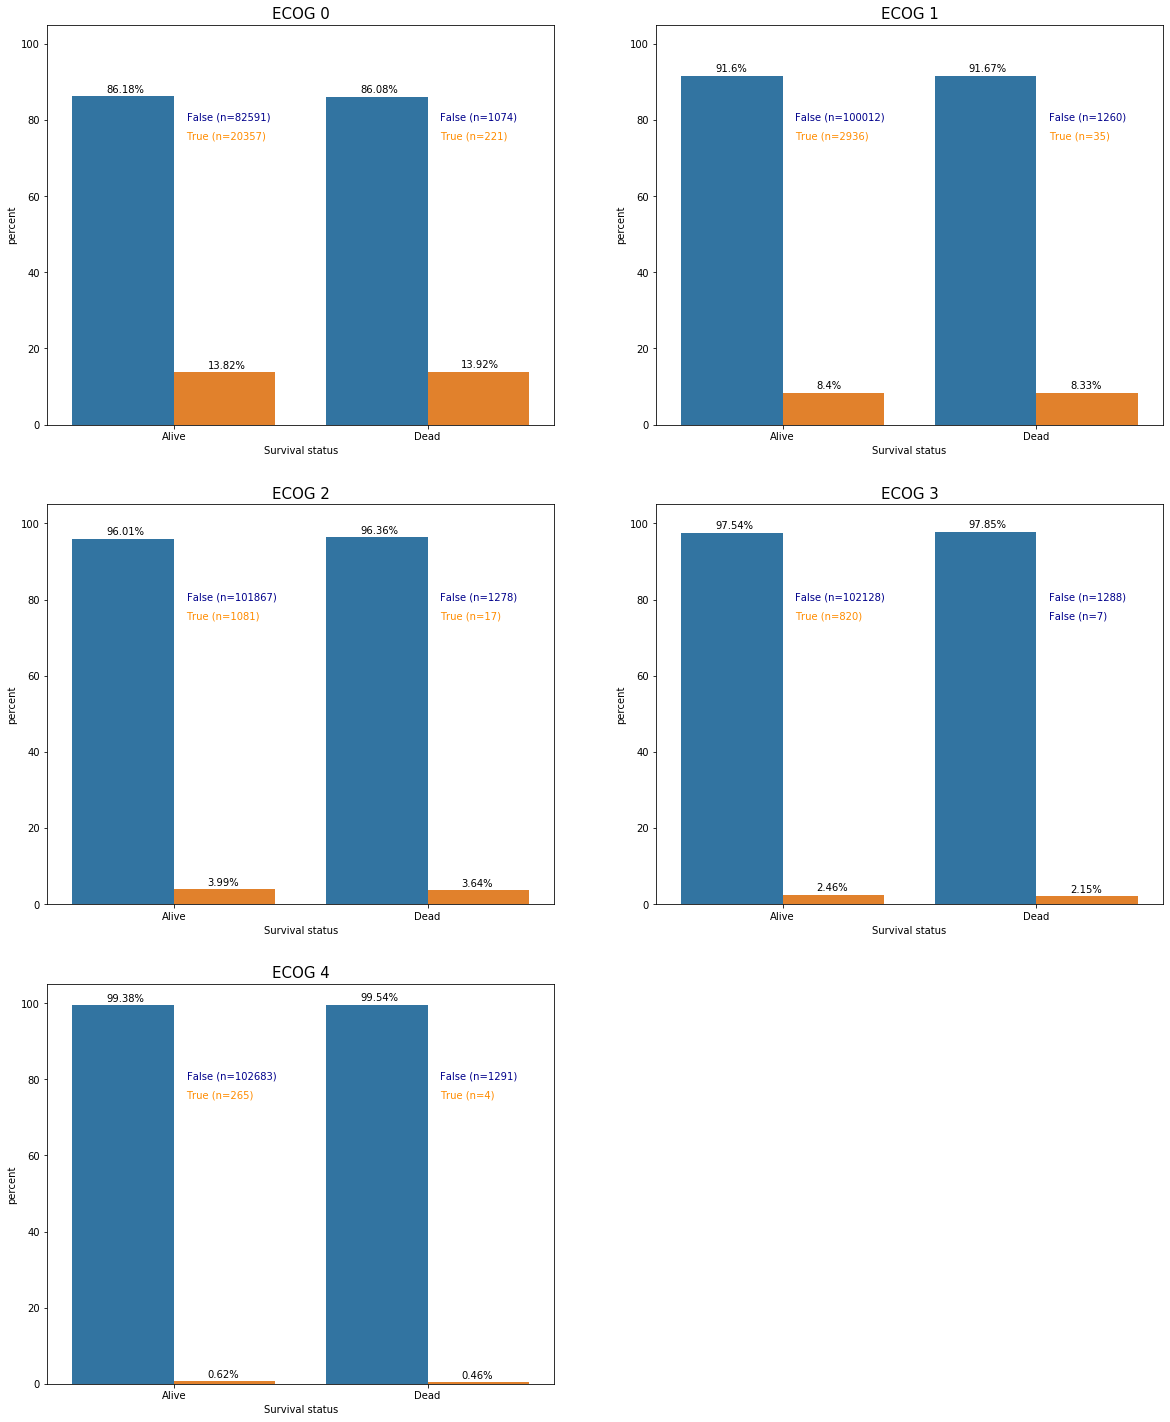

In [150]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'ECOG0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('ECOG 0', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=82591)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=20357)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1074)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=221)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'ECOG1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('ECOG 1', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, 'False (n=100012)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, 'True (n=2936)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, 'False (n=1260)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, 'True (n=35)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'ECOG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('ECOG 2', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=101867)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=1081)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1278)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=17)", horizontalalignment='left', size='medium', color='darkorange') 
    

#Figure 4
x, y = 'DEAD', 'ECOG3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('ECOG 3', fontsize=15) 
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=102128)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=820)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1288)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "False (n=7)", horizontalalignment='left', size='medium', color='darkblue')

#Figure 5
x, y = 'DEAD', 'ECOG4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('ECOG 4', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=102683)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=265)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1291)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=4)", horizontalalignment='left', size='medium', color='darkorange')
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [151]:
contingency = pd.crosstab(df['DEAD'], df['ECOG0'])
contingency

ECOG0,False,True
DEAD,,
0,21750,3487
1,7276,1177


In [152]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8193135234697189


In [153]:
contingency = pd.crosstab(df['DEAD'], df['ECOG1'])
contingency

ECOG1,False,True
DEAD,,
0,23116,2121
1,7749,704


In [154]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8451549756747971


In [155]:
contingency = pd.crosstab(df['DEAD'], df['ECOG2'])
contingency

ECOG2,False,True
DEAD,,
0,24229,1008
1,8145,308


In [156]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.15943274953599107


In [157]:
contingency = pd.crosstab(df['DEAD'], df['ECOG3'])
contingency

ECOG3,False,True
DEAD,,
0,24615,622
1,8271,182


In [158]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.11338493756295197


In [159]:
contingency = pd.crosstab(df['DEAD'], df['ECOG4'])
contingency

ECOG4,False,True
DEAD,,
0,25081,156
1,8414,39


In [160]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.11838033861828934


In [161]:
df.groupby('DEAD')['DEPR1'].value_counts()

DEAD  DEPR1
0     False    19616
      True      5621
1     False     6597
      True      1856
Name: DEPR1, dtype: int64

In [162]:
df.groupby('DEAD')['DEPR2'].value_counts()

DEAD  DEPR2
0     False    19443
      True      5794
1     False     6547
      True      1906
Name: DEPR2, dtype: int64

In [163]:
df.groupby('DEAD')['DEPR3'].value_counts()

DEAD  DEPR3
0     False    19945
      True      5292
1     False     6742
      True      1711
Name: DEPR3, dtype: int64

In [164]:
df.groupby('DEAD')['DEPR4'].value_counts()

DEAD  DEPR4
0     False    20612
      True      4625
1     False     6861
      True      1592
Name: DEPR4, dtype: int64

In [165]:
df.groupby('DEAD')['DEPR5'].value_counts()

DEAD  DEPR5
0     False    21316
      True      3921
1     False     7064
      True      1389
Name: DEPR5, dtype: int64

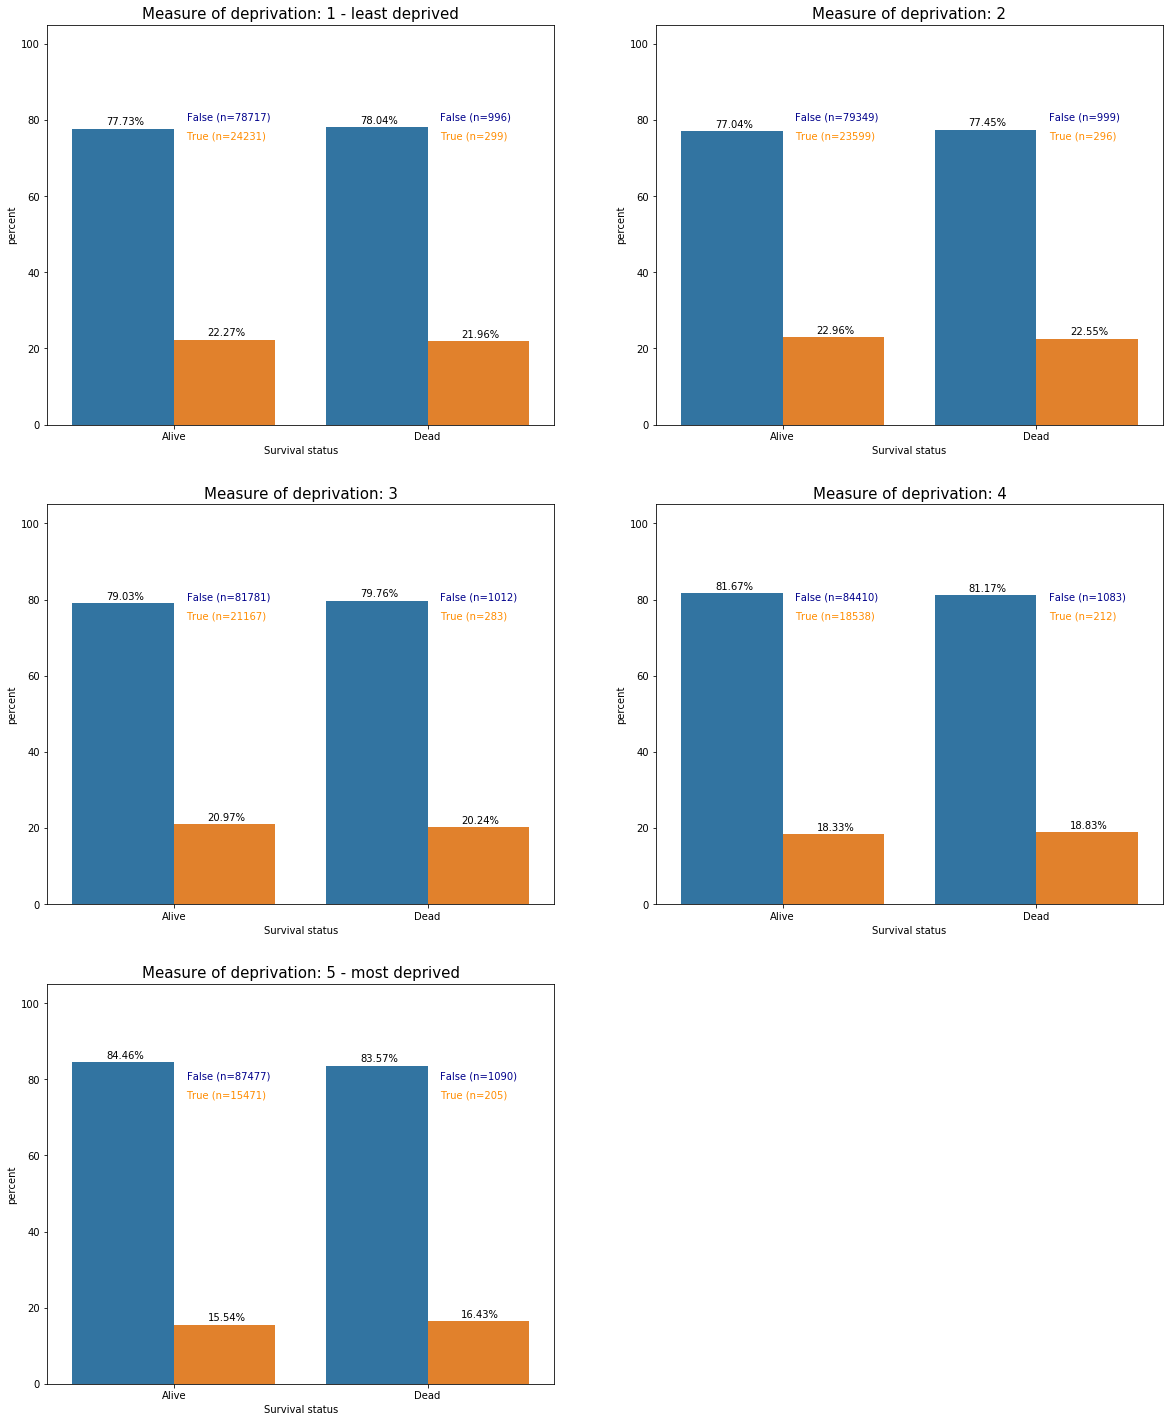

In [166]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'DEPR1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Measure of deprivation: 1 - least deprived', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=78717)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=24231)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=996)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=299)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'DEPR2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Measure of deprivation: 2', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=79349)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=23599)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=999)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=296)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'DEPR3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Measure of deprivation: 3', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=81781)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=21167)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1012)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=283)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'DEPR4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Measure of deprivation: 4', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=84410)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=18538)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1083)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=212)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'DEPR5'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Measure of deprivation: 5 - most deprived', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=87477)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=15471)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1090)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=205)", horizontalalignment='left', size='medium', color='darkorange')    
    

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [167]:
contingency = pd.crosstab(df['DEAD'], df['DEPR1'])
contingency

DEPR1,False,True
DEAD,,
0,19616,5621
1,6597,1856


In [168]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5549981649383733


In [169]:
contingency = pd.crosstab(df['DEAD'], df['DEPR2'])
contingency

DEPR2,False,True
DEAD,,
0,19443,5794
1,6547,1906


In [170]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.4458838241750879


In [171]:
contingency = pd.crosstab(df['DEAD'], df['DEPR3'])
contingency

DEPR3,False,True
DEAD,,
0,19945,5292
1,6742,1711


In [172]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.1579793555134475


In [173]:
contingency = pd.crosstab(df['DEAD'], df['DEPR4'])
contingency

DEPR4,False,True
DEAD,,
0,20612,4625
1,6861,1592


In [174]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3056475532251929


In [175]:
contingency = pd.crosstab(df['DEAD'], df['DEPR5'])
contingency

DEPR5,False,True
DEAD,,
0,21316,3921
1,7064,1389


In [176]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.052622915998447


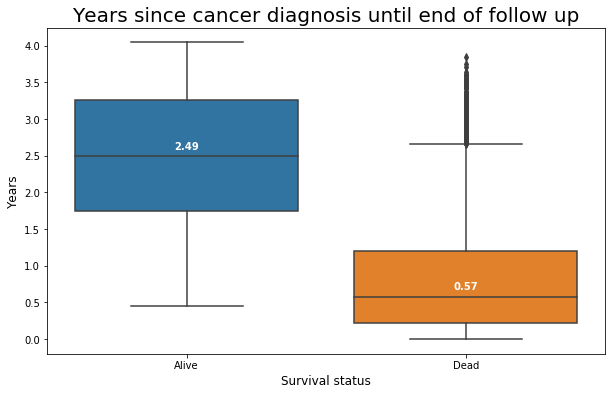

In [177]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'CANCER_YEARS_MEDIAN')

medians = df.groupby(['DEAD'])['CANCER_YEARS_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.1, median_labels[tick], 
            horizontalalignment='center', size='medium', color='white', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Years', fontsize=12)
ax.set_title('Years since cancer diagnosis until end of follow up', fontsize=20)
plt.gcf().set_size_inches(10,6)

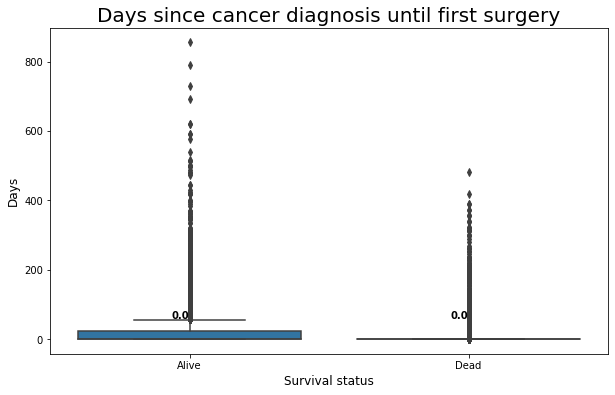

In [244]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'DIAG_TO_SURG_DAYS_MEDIAN')

medians = df.groupby(['DEAD'])['DIAG_TO_SURG_DAYS_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 60, median_labels[tick], 
            horizontalalignment='right', size='medium', color='black', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Days', fontsize=12)
ax.set_title('Days since cancer diagnosis until first surgery', fontsize=20)
plt.gcf().set_size_inches(10,6)

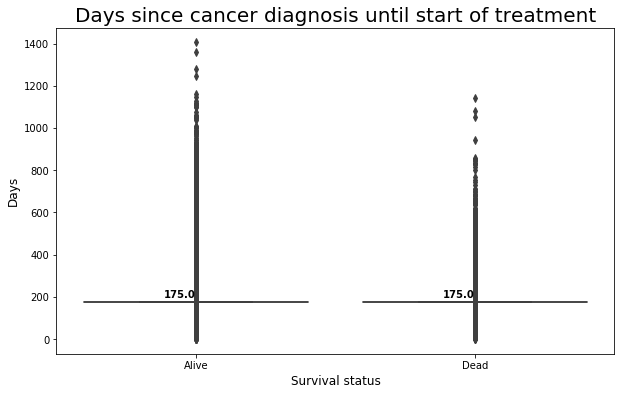

In [245]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'DIAG_TO_TREAT_DAYS_MEDIAN')

medians = df.groupby(['DEAD'])['DIAG_TO_TREAT_DAYS_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 20, median_labels[tick], 
            horizontalalignment='right', size='medium', color='black', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Days', fontsize=12)
ax.set_title('Days since cancer diagnosis until start of treatment', fontsize=20)
plt.gcf().set_size_inches(10,6)

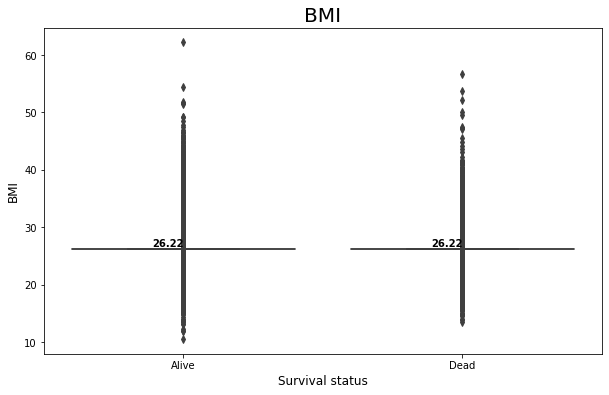

In [246]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'BMI')

medians = df.groupby(['DEAD'])['BMI'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='right', size='medium', color='black', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('BMI', fontsize=12)
ax.set_title('BMI', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [181]:
df['BMI'].describe()

count    33690.000000
mean        26.273445
std          2.342596
min         10.563941
25%         26.218821
50%         26.218821
75%         26.218821
max         62.180424
Name: BMI, dtype: float64

In [182]:
df.groupby('DEAD')['NEOADJUVANT'].value_counts()

DEAD  NEOADJUVANT
0     False          24617
      True             620
1     False           8256
      True             197
Name: NEOADJUVANT, dtype: int64

In [183]:
df.groupby('DEAD')['DIAGNOSTIC'].value_counts()

DEAD  DIAGNOSTIC
0     False         25037
      True            200
1     False          8391
      True             62
Name: DIAGNOSTIC, dtype: int64

In [184]:
df.groupby('DEAD')['PALLIATIVE'].value_counts()

DEAD  PALLIATIVE
0     False         22013
      True           3224
1     False          7188
      True           1265
Name: PALLIATIVE, dtype: int64

In [185]:
df.groupby('DEAD')['CURATIVE'].value_counts()

DEAD  CURATIVE
0     False       24793
      True          444
1     False        8351
      True          102
Name: CURATIVE, dtype: int64

In [186]:
df.groupby('DEAD')['ADJUVANT'].value_counts()

DEAD  ADJUVANT
0     False       22530
      True         2707
1     False        7337
      True         1116
Name: ADJUVANT, dtype: int64

In [187]:
df.groupby('DEAD')['DISEASE_MOD'].value_counts()

DEAD  DISEASE_MOD
0     False          25234
      True               3
1     False           8452
      True               1
Name: DISEASE_MOD, dtype: int64

In [188]:
df.groupby('DEAD')['STAGING'].value_counts()

DEAD  STAGING
0     False      25236
      True           1
1     False       8453
Name: STAGING, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


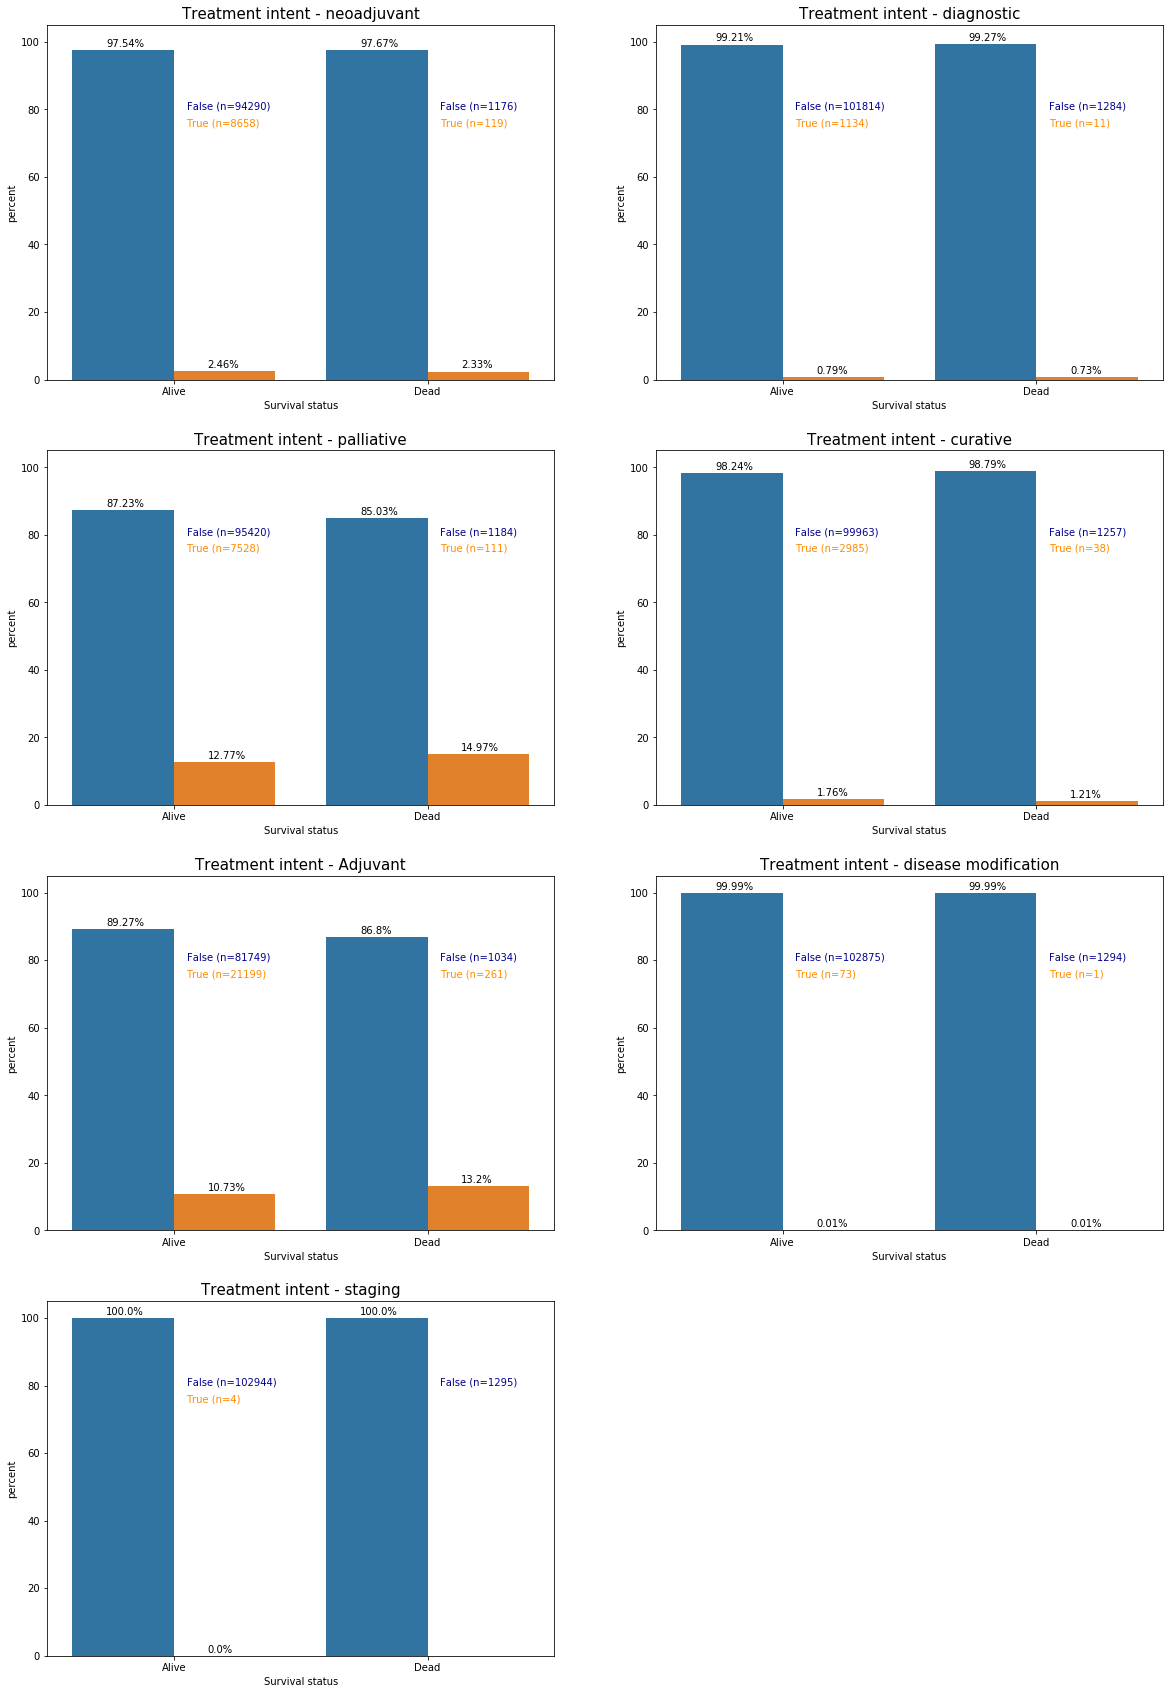

In [189]:
f, axes = plt.subplots(4, 2, figsize=(20, 30))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'NEOADJUVANT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Treatment intent - neoadjuvant', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=94290)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=8658)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1176)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=119)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'DIAGNOSTIC'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Treatment intent - diagnostic', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=101814)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=1134)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1284)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=11)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'PALLIATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Treatment intent - palliative', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=95420)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=7528)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1184)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=111)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 4
x, y = 'DEAD', 'CURATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Treatment intent - curative', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=99963)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=2985)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1257)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=38)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'ADJUVANT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Treatment intent - Adjuvant', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=81749)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=21199)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1034)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=261)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 6
x, y = 'DEAD', 'DISEASE_MOD'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('Treatment intent - disease modification', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 80, "False (n=102875)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=73)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=1294)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 75, "True (n=1)", horizontalalignment='left', size='medium', color='darkorange')  


#Figure 7
x, y = 'DEAD', 'STAGING'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('Treatment intent - staging', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)    
    
for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=102944)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=4)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')

 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
f.delaxes(ax = axes[3,1]) 
plt.show()

In [190]:
contingency = pd.crosstab(df['DEAD'], df['NEOADJUVANT'])
contingency

NEOADJUVANT,False,True
DEAD,,
0,24617,620
1,8256,197


In [191]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5406253080656196


In [192]:
contingency = pd.crosstab(df['DEAD'], df['DIAGNOSTIC'])
contingency

DIAGNOSTIC,False,True
DEAD,,
0,25037,200
1,8391,62


In [193]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6432811801629642


In [194]:
contingency = pd.crosstab(df['DEAD'], df['PALLIATIVE'])
contingency

PALLIATIVE,False,True
DEAD,,
0,22013,3224
1,7188,1265


In [195]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

3.222219435041398e-07


In [196]:
contingency = pd.crosstab(df['DEAD'], df['CURATIVE'])
contingency

CURATIVE,False,True
DEAD,,
0,24793,444
1,8351,102


In [197]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0005969076101553698


In [198]:
contingency = pd.crosstab(df['DEAD'], df['ADJUVANT'])
contingency

ADJUVANT,False,True
DEAD,,
0,22530,2707
1,7337,1116


In [199]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

5.926221087450134e-10


In [200]:
contingency = pd.crosstab(df['DEAD'], df['DISEASE_MOD'])
contingency

DISEASE_MOD,False,True
DEAD,,
0,25234,3
1,8452,1


In [201]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.566974189741997


In [202]:
contingency = pd.crosstab(df['DEAD'], df['STAGING'])
contingency

STAGING,False,True
DEAD,,
0,25236,1
1,8453,0


In [203]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5655779613330609


In [204]:
df.groupby('DEAD')['CT_YES'].value_counts()

DEAD  CT_YES
0     False     24817
      True        420
1     False      8330
      True        123
Name: CT_YES, dtype: int64

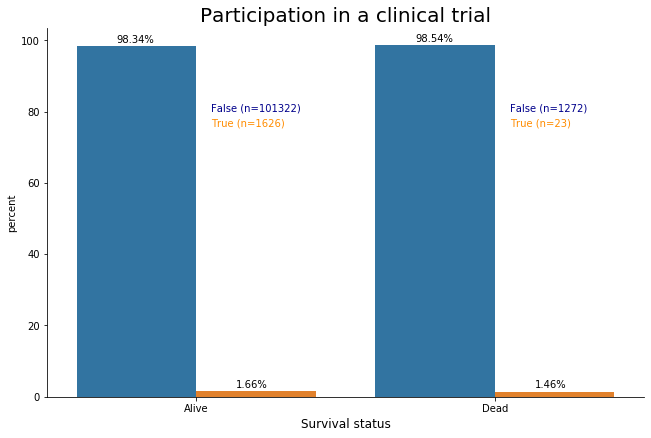

In [205]:
x, y = 'DEAD', 'CT_YES'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('Participation in a clinical trial', fontsize=20)
ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(10,6)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 80, "False (n=101322)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 76, "True (n=1626)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, "False (n=1272)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 76, "True (n=23)", horizontalalignment='left', size='medium', color='darkorange');

In [206]:
contingency = pd.crosstab(df['DEAD'], df['CT_YES'])
contingency

CT_YES,False,True
DEAD,,
0,24817,420
1,8330,123


In [207]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.20353804345116572


In [208]:
df.groupby('DEAD')['CHEM_RAD_YES'].value_counts()

DEAD  CHEM_RAD_YES
0     False           25063
      True              174
1     False            8427
      True               26
Name: CHEM_RAD_YES, dtype: int64

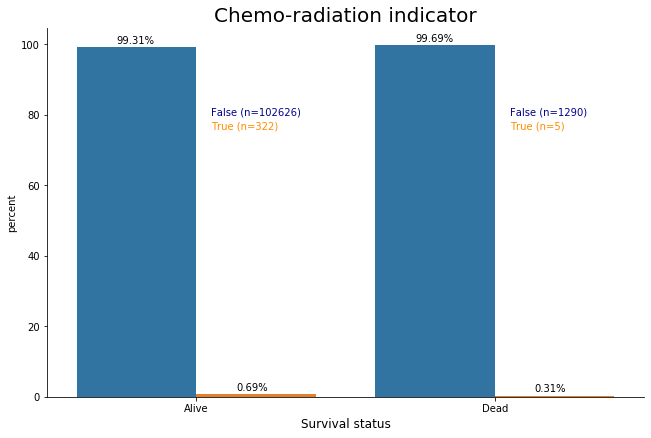

In [209]:
x, y = 'DEAD', 'CHEM_RAD_YES'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('Chemo-radiation indicator', fontsize=20)
ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(10,6)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 80, "False (n=102626)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 76, "True (n=322)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, "False (n=1290)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 76, "True (n=5)", horizontalalignment='left', size='medium', color='darkorange');

In [210]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_RAD_YES'])
contingency

CHEM_RAD_YES,False,True
DEAD,,
0,25063,174
1,8427,26


In [211]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.00010707824802816141


In [212]:
df.groupby('DEAD')['CHEMOTHERAPY2'].value_counts()

DEAD  CHEMOTHERAPY2
0     False            20319
      True              4918
1     False             6471
      True              1982
Name: CHEMOTHERAPY2, dtype: int64

In [213]:
df.groupby('DEAD')['TARGETED2'].value_counts()

DEAD  TARGETED2
0     False        24546
      True           691
1     False         8224
      True           229
Name: TARGETED2, dtype: int64

In [214]:
df.groupby('DEAD')['CHEM_TARG2'].value_counts()

DEAD  CHEM_TARG2
0     False         24225
      True           1012
1     False          8130
      True            323
Name: CHEM_TARG2, dtype: int64

In [215]:
df.groupby('DEAD')['CHEM_RADIO2'].value_counts()

DEAD  CHEM_RADIO2
0     False          25063
      True             174
1     False           8419
      True              34
Name: CHEM_RADIO2, dtype: int64

In [216]:
df.groupby('DEAD')['TARG_RADIO2'].value_counts()

DEAD  TARG_RADIO2
0     False          25235
      True               2
1     False           8453
Name: TARG_RADIO2, dtype: int64

In [217]:
df.groupby('DEAD')['HORMONE2'].value_counts()

DEAD  HORMONE2
0     False       25114
      True          123
1     False        8438
      True           15
Name: HORMONE2, dtype: int64

In [218]:
df.groupby('DEAD')['OTHER2'].value_counts()

DEAD  OTHER2
0     False     25190
      True         47
1     False      8436
      True         17
Name: OTHER2, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


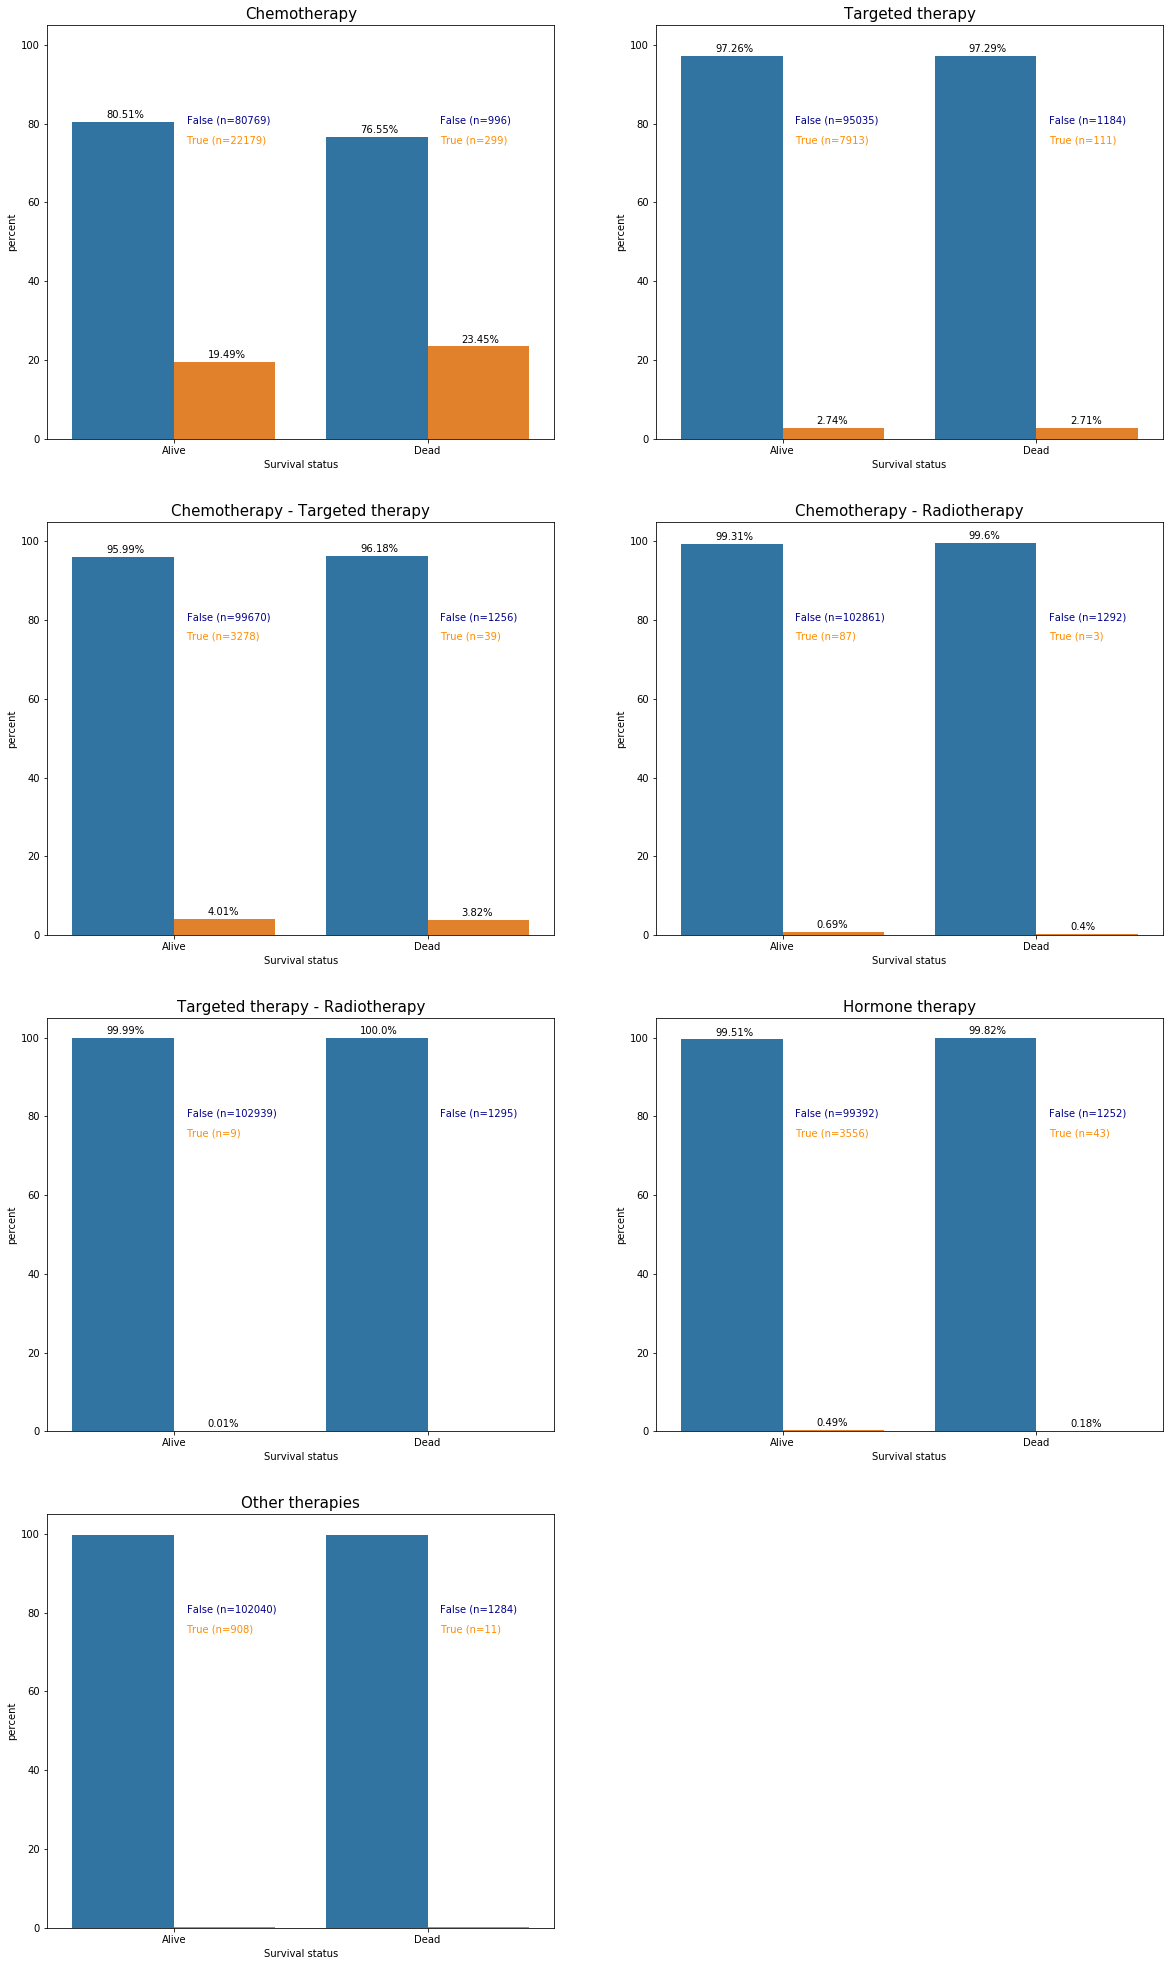

In [219]:
f, axes = plt.subplots(4, 2, figsize=(20, 35))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'CHEMOTHERAPY2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Chemotherapy', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=80769)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=22179)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=996)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=299)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'TARGETED2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Targeted therapy', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=95035)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=7913)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1184)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=111)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'CHEM_TARG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Chemotherapy - Targeted therapy', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=99670)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=3278)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1256)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=39)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 4
x, y = 'DEAD', 'CHEM_RADIO2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Chemotherapy - Radiotherapy', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=102861)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=87)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1292)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=3)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'TARG_RADIO2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Targeted therapy - Radiotherapy', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=102939)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=9)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')

    
#Figure 6
x, y = 'DEAD', 'HORMONE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('Hormone therapy', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)
    
axes[2,1].text(0.05, 80, "False (n=99392)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=3556)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=1252)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 75, "True (n=43)", horizontalalignment='left', size='medium', color='darkorange')   


#Figure 9
x, y = 'DEAD', 'OTHER2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('Other therapies', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6) 
    
for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=102040)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=908)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=1284)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 75, "True (n=11)", horizontalalignment='left', size='medium', color='darkorange')
     
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
f.delaxes(ax = axes[3,1]) 
plt.show()

In [220]:
contingency = pd.crosstab(df['DEAD'], df['CHEMOTHERAPY2'])
contingency

CHEMOTHERAPY2,False,True
DEAD,,
0,20319,4918
1,6471,1982


In [221]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

6.551549394401592e-15


In [222]:
contingency = pd.crosstab(df['DEAD'], df['TARGETED2'])
contingency

TARGETED2,False,True
DEAD,,
0,24546,691
1,8224,229


In [223]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9181413053575084


In [224]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_TARG2'])
contingency

CHEM_TARG2,False,True
DEAD,,
0,24225,1012
1,8130,323


In [225]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.46042066407680027


In [226]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_RADIO2'])
contingency

CHEM_RADIO2,False,True
DEAD,,
0,25063,174
1,8419,34


In [227]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.004543094442757092


In [228]:
contingency = pd.crosstab(df['DEAD'], df['TARG_RADIO2'])
contingency

TARG_RADIO2,False,True
DEAD,,
0,25235,2
1,8453,0


In [229]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9976436333889455


In [230]:
contingency = pd.crosstab(df['DEAD'], df['HORMONE2'])
contingency

HORMONE2,False,True
DEAD,,
0,25114,123
1,8438,15


In [231]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.000167921087099941


In [232]:
contingency = pd.crosstab(df['DEAD'], df['OTHER2'])
contingency

OTHER2,False,True
DEAD,,
0,25190,47
1,8436,17


In [233]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.898481776193374


In [234]:
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD
0,10001000,F,White British,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,472.5,20.910494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,10001128,F,NaN,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,10001482,F,NaN,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,596.5,33.930521,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,0
7,10001901,M,NaN,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,1.325147,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
8,10002351,F,NaN,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,1.158135,29.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
